# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input2'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

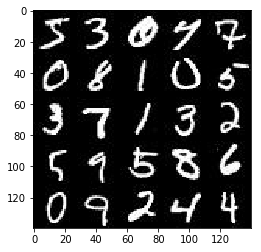

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

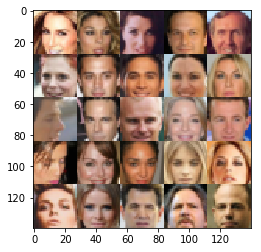

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, (None), name='learning_rate')
    
    return inputs_real, inputs_z, learning_rate
    #return None, None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha=0.1):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    kinit = tf.random_normal_initializer(stddev=0.02)
    
    with tf.variable_scope('discriminator', reuse=reuse):      
        
        # Input is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, kernel_initializer=kinit, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, kernel_initializer=kinit, padding='same')
        relu2 = tf.maximum(alpha * x2, x2)
        bn2 = tf.layers.batch_normalization(relu2, training=True)
        # 7x7x128
        
        
        x3 = tf.layers.conv2d(bn2, 256, 5, strides=2, kernel_initializer=kinit, padding='same')
        relu3 = tf.maximum(alpha * x3, x3)
        bn3 = tf.layers.batch_normalization(relu3, training=True)
        # 4x4x256
        
        flat = tf.reshape(bn3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        
        out = tf.sigmoid(logits)
        
        
        
        
        return out, logits

    return None, None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.1):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse = not is_train
    kinit = tf.random_normal_initializer(stddev=0.02)
    
    with tf.variable_scope('generator', reuse=reuse):  
        
        x1 = tf.layers.dense(z, 7*7*256)
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, kernel_initializer=kinit, padding='same')
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, kernel_initializer=kinit, padding='same')
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, kernel_initializer=kinit, padding='same')
        
        out = tf.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    out_channel_dim = data_shape[3]
    
    input_real, input_z, learn_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim, alpha=0.2)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images *= 2
                print('Iteration:', steps)
                
                # TODO: Train Model
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})
                
                
                if steps % 10 == 0:                    
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 50 == 0:
                    show_generator_output(sess, 25, input_z, out_channel_dim, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Epoch 0/2... Discriminator Loss: 0.7216... Generator Loss: 0.8810
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Epoch 0/2... Discriminator Loss: 0.2540... Generator Loss: 1.8666
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Epoch 0/2... Discriminator Loss: 0.1415... Generator Loss: 2.4993
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Epoch 0/2... Discriminator Loss: 0.0817... Generator Loss: 3.0237
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Epoch 0/2... Discriminator Loss: 0.0525... Ge

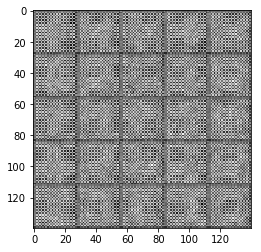

Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Epoch 0/2... Discriminator Loss: 0.0325... Generator Loss: 4.0931
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Epoch 0/2... Discriminator Loss: 0.0404... Generator Loss: 3.8887
Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
Epoch 0/2... Discriminator Loss: 0.0235... Generator Loss: 4.3372
Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
Epoch 0/2... Discriminator Loss: 0.0197... Generator Loss: 4.6019
Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
Epoch 0/2... Discriminator Loss: 0.

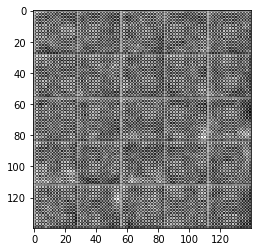

Iteration: 101
Iteration: 102
Iteration: 103
Iteration: 104
Iteration: 105
Iteration: 106
Iteration: 107
Iteration: 108
Iteration: 109
Iteration: 110
Epoch 0/2... Discriminator Loss: 0.0271... Generator Loss: 4.2556
Iteration: 111
Iteration: 112
Iteration: 113
Iteration: 114
Iteration: 115
Iteration: 116
Iteration: 117
Iteration: 118
Iteration: 119
Iteration: 120
Epoch 0/2... Discriminator Loss: 0.0263... Generator Loss: 4.4099
Iteration: 121
Iteration: 122
Iteration: 123
Iteration: 124
Iteration: 125
Iteration: 126
Iteration: 127
Iteration: 128
Iteration: 129
Iteration: 130
Epoch 0/2... Discriminator Loss: 0.0181... Generator Loss: 4.5690
Iteration: 131
Iteration: 132
Iteration: 133
Iteration: 134
Iteration: 135
Iteration: 136
Iteration: 137
Iteration: 138
Iteration: 139
Iteration: 140
Epoch 0/2... Discriminator Loss: 0.0207... Generator Loss: 4.6444
Iteration: 141
Iteration: 142
Iteration: 143
Iteration: 144
Iteration: 145
Iteration: 146
Iteration: 147
Iteration: 148
Iteration: 149
I

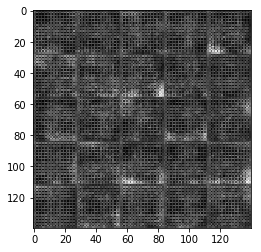

Iteration: 151
Iteration: 152
Iteration: 153
Iteration: 154
Iteration: 155
Iteration: 156
Iteration: 157
Iteration: 158
Iteration: 159
Iteration: 160
Epoch 0/2... Discriminator Loss: 0.0203... Generator Loss: 4.8319
Iteration: 161
Iteration: 162
Iteration: 163
Iteration: 164
Iteration: 165
Iteration: 166
Iteration: 167
Iteration: 168
Iteration: 169
Iteration: 170
Epoch 0/2... Discriminator Loss: 0.0281... Generator Loss: 4.6697
Iteration: 171
Iteration: 172
Iteration: 173
Iteration: 174
Iteration: 175
Iteration: 176
Iteration: 177
Iteration: 178
Iteration: 179
Iteration: 180
Epoch 0/2... Discriminator Loss: 0.0224... Generator Loss: 4.9633
Iteration: 181
Iteration: 182
Iteration: 183
Iteration: 184
Iteration: 185
Iteration: 186
Iteration: 187
Iteration: 188
Iteration: 189
Iteration: 190
Epoch 0/2... Discriminator Loss: 0.0272... Generator Loss: 5.0249
Iteration: 191
Iteration: 192
Iteration: 193
Iteration: 194
Iteration: 195
Iteration: 196
Iteration: 197
Iteration: 198
Iteration: 199
I

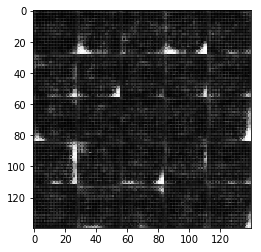

Iteration: 201
Iteration: 202
Iteration: 203
Iteration: 204
Iteration: 205
Iteration: 206
Iteration: 207
Iteration: 208
Iteration: 209
Iteration: 210
Epoch 0/2... Discriminator Loss: 0.0983... Generator Loss: 5.1867
Iteration: 211
Iteration: 212
Iteration: 213
Iteration: 214
Iteration: 215
Iteration: 216
Iteration: 217
Iteration: 218
Iteration: 219
Iteration: 220
Epoch 0/2... Discriminator Loss: 0.1024... Generator Loss: 3.2480
Iteration: 221
Iteration: 222
Iteration: 223
Iteration: 224
Iteration: 225
Iteration: 226
Iteration: 227
Iteration: 228
Iteration: 229
Iteration: 230
Epoch 0/2... Discriminator Loss: 0.1231... Generator Loss: 3.3841
Iteration: 231
Iteration: 232
Iteration: 233
Iteration: 234
Iteration: 235
Iteration: 236
Iteration: 237
Iteration: 238
Iteration: 239
Iteration: 240
Epoch 0/2... Discriminator Loss: 1.0674... Generator Loss: 0.6375
Iteration: 241
Iteration: 242
Iteration: 243
Iteration: 244
Iteration: 245
Iteration: 246
Iteration: 247
Iteration: 248
Iteration: 249
I

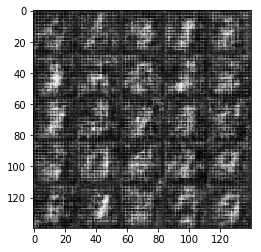

Iteration: 251
Iteration: 252
Iteration: 253
Iteration: 254
Iteration: 255
Iteration: 256
Iteration: 257
Iteration: 258
Iteration: 259
Iteration: 260
Epoch 0/2... Discriminator Loss: 0.1324... Generator Loss: 2.9195
Iteration: 261
Iteration: 262
Iteration: 263
Iteration: 264
Iteration: 265
Iteration: 266
Iteration: 267
Iteration: 268
Iteration: 269
Iteration: 270
Epoch 0/2... Discriminator Loss: 0.4720... Generator Loss: 2.2655
Iteration: 271
Iteration: 272
Iteration: 273
Iteration: 274
Iteration: 275
Iteration: 276
Iteration: 277
Iteration: 278
Iteration: 279
Iteration: 280
Epoch 0/2... Discriminator Loss: 0.3320... Generator Loss: 1.9700
Iteration: 281
Iteration: 282
Iteration: 283
Iteration: 284
Iteration: 285
Iteration: 286
Iteration: 287
Iteration: 288
Iteration: 289
Iteration: 290
Epoch 0/2... Discriminator Loss: 1.6793... Generator Loss: 0.2688
Iteration: 291
Iteration: 292
Iteration: 293
Iteration: 294
Iteration: 295
Iteration: 296
Iteration: 297
Iteration: 298
Iteration: 299
I

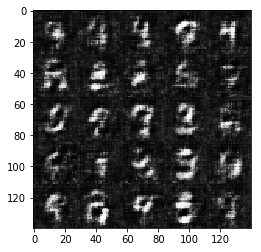

Iteration: 301
Iteration: 302
Iteration: 303
Iteration: 304
Iteration: 305
Iteration: 306
Iteration: 307
Iteration: 308
Iteration: 309
Iteration: 310
Epoch 0/2... Discriminator Loss: 0.4145... Generator Loss: 1.5669
Iteration: 311
Iteration: 312
Iteration: 313
Iteration: 314
Iteration: 315
Iteration: 316
Iteration: 317
Iteration: 318
Iteration: 319
Iteration: 320
Epoch 0/2... Discriminator Loss: 0.5294... Generator Loss: 1.8025
Iteration: 321
Iteration: 322
Iteration: 323
Iteration: 324
Iteration: 325
Iteration: 326
Iteration: 327
Iteration: 328
Iteration: 329
Iteration: 330
Epoch 0/2... Discriminator Loss: 0.4103... Generator Loss: 1.5575
Iteration: 331
Iteration: 332
Iteration: 333
Iteration: 334
Iteration: 335
Iteration: 336
Iteration: 337
Iteration: 338
Iteration: 339
Iteration: 340
Epoch 0/2... Discriminator Loss: 0.2803... Generator Loss: 2.1679
Iteration: 341
Iteration: 342
Iteration: 343
Iteration: 344
Iteration: 345
Iteration: 346
Iteration: 347
Iteration: 348
Iteration: 349
I

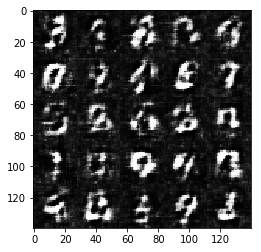

Iteration: 351
Iteration: 352
Iteration: 353
Iteration: 354
Iteration: 355
Iteration: 356
Iteration: 357
Iteration: 358
Iteration: 359
Iteration: 360
Epoch 0/2... Discriminator Loss: 0.3888... Generator Loss: 1.7828
Iteration: 361
Iteration: 362
Iteration: 363
Iteration: 364
Iteration: 365
Iteration: 366
Iteration: 367
Iteration: 368
Iteration: 369
Iteration: 370
Epoch 0/2... Discriminator Loss: 0.5059... Generator Loss: 1.2769
Iteration: 371
Iteration: 372
Iteration: 373
Iteration: 374
Iteration: 375
Iteration: 376
Iteration: 377
Iteration: 378
Iteration: 379
Iteration: 380
Epoch 0/2... Discriminator Loss: 0.4090... Generator Loss: 2.3575
Iteration: 381
Iteration: 382
Iteration: 383
Iteration: 384
Iteration: 385
Iteration: 386
Iteration: 387
Iteration: 388
Iteration: 389
Iteration: 390
Epoch 0/2... Discriminator Loss: 0.6137... Generator Loss: 1.5102
Iteration: 391
Iteration: 392
Iteration: 393
Iteration: 394
Iteration: 395
Iteration: 396
Iteration: 397
Iteration: 398
Iteration: 399
I

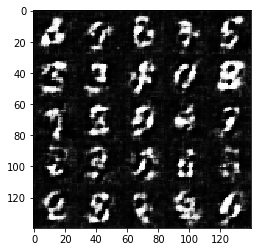

Iteration: 401
Iteration: 402
Iteration: 403
Iteration: 404
Iteration: 405
Iteration: 406
Iteration: 407
Iteration: 408
Iteration: 409
Iteration: 410
Epoch 0/2... Discriminator Loss: 0.4767... Generator Loss: 1.7820
Iteration: 411
Iteration: 412
Iteration: 413
Iteration: 414
Iteration: 415
Iteration: 416
Iteration: 417
Iteration: 418
Iteration: 419
Iteration: 420
Epoch 0/2... Discriminator Loss: 0.4885... Generator Loss: 2.0135
Iteration: 421
Iteration: 422
Iteration: 423
Iteration: 424
Iteration: 425
Iteration: 426
Iteration: 427
Iteration: 428
Iteration: 429
Iteration: 430
Epoch 0/2... Discriminator Loss: 0.5439... Generator Loss: 1.7277
Iteration: 431
Iteration: 432
Iteration: 433
Iteration: 434
Iteration: 435
Iteration: 436
Iteration: 437
Iteration: 438
Iteration: 439
Iteration: 440
Epoch 0/2... Discriminator Loss: 0.4990... Generator Loss: 1.5239
Iteration: 441
Iteration: 442
Iteration: 443
Iteration: 444
Iteration: 445
Iteration: 446
Iteration: 447
Iteration: 448
Iteration: 449
I

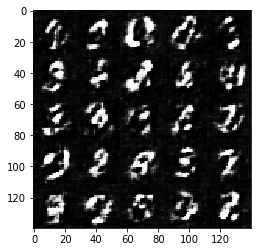

Iteration: 451
Iteration: 452
Iteration: 453
Iteration: 454
Iteration: 455
Iteration: 456
Iteration: 457
Iteration: 458
Iteration: 459
Iteration: 460
Epoch 0/2... Discriminator Loss: 0.7298... Generator Loss: 0.9294
Iteration: 461
Iteration: 462
Iteration: 463
Iteration: 464
Iteration: 465
Iteration: 466
Iteration: 467
Iteration: 468
Iteration: 469
Iteration: 470
Epoch 0/2... Discriminator Loss: 0.7402... Generator Loss: 0.8592
Iteration: 471
Iteration: 472
Iteration: 473
Iteration: 474
Iteration: 475
Iteration: 476
Iteration: 477
Iteration: 478
Iteration: 479
Iteration: 480
Epoch 0/2... Discriminator Loss: 0.5046... Generator Loss: 1.4119
Iteration: 481
Iteration: 482
Iteration: 483
Iteration: 484
Iteration: 485
Iteration: 486
Iteration: 487
Iteration: 488
Iteration: 489
Iteration: 490
Epoch 0/2... Discriminator Loss: 1.1885... Generator Loss: 0.4677
Iteration: 491
Iteration: 492
Iteration: 493
Iteration: 494
Iteration: 495
Iteration: 496
Iteration: 497
Iteration: 498
Iteration: 499
I

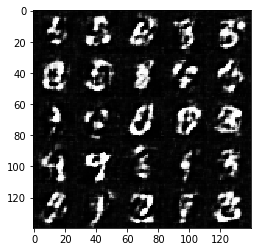

Iteration: 501
Iteration: 502
Iteration: 503
Iteration: 504
Iteration: 505
Iteration: 506
Iteration: 507
Iteration: 508
Iteration: 509
Iteration: 510
Epoch 0/2... Discriminator Loss: 0.6451... Generator Loss: 1.8558
Iteration: 511
Iteration: 512
Iteration: 513
Iteration: 514
Iteration: 515
Iteration: 516
Iteration: 517
Iteration: 518
Iteration: 519
Iteration: 520
Epoch 0/2... Discriminator Loss: 0.4461... Generator Loss: 1.9527
Iteration: 521
Iteration: 522
Iteration: 523
Iteration: 524
Iteration: 525
Iteration: 526
Iteration: 527
Iteration: 528
Iteration: 529
Iteration: 530
Epoch 0/2... Discriminator Loss: 0.5746... Generator Loss: 1.5725
Iteration: 531
Iteration: 532
Iteration: 533
Iteration: 534
Iteration: 535
Iteration: 536
Iteration: 537
Iteration: 538
Iteration: 539
Iteration: 540
Epoch 0/2... Discriminator Loss: 0.3896... Generator Loss: 1.7934
Iteration: 541
Iteration: 542
Iteration: 543
Iteration: 544
Iteration: 545
Iteration: 546
Iteration: 547
Iteration: 548
Iteration: 549
I

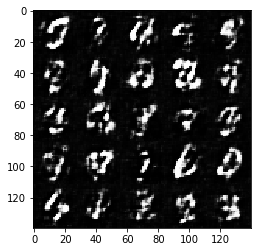

Iteration: 551
Iteration: 552
Iteration: 553
Iteration: 554
Iteration: 555
Iteration: 556
Iteration: 557
Iteration: 558
Iteration: 559
Iteration: 560
Epoch 0/2... Discriminator Loss: 0.4732... Generator Loss: 1.5058
Iteration: 561
Iteration: 562
Iteration: 563
Iteration: 564
Iteration: 565
Iteration: 566
Iteration: 567
Iteration: 568
Iteration: 569
Iteration: 570
Epoch 0/2... Discriminator Loss: 0.7136... Generator Loss: 0.8994
Iteration: 571
Iteration: 572
Iteration: 573
Iteration: 574
Iteration: 575
Iteration: 576
Iteration: 577
Iteration: 578
Iteration: 579
Iteration: 580
Epoch 0/2... Discriminator Loss: 0.4596... Generator Loss: 1.5203
Iteration: 581
Iteration: 582
Iteration: 583
Iteration: 584
Iteration: 585
Iteration: 586
Iteration: 587
Iteration: 588
Iteration: 589
Iteration: 590
Epoch 0/2... Discriminator Loss: 0.4988... Generator Loss: 1.3386
Iteration: 591
Iteration: 592
Iteration: 593
Iteration: 594
Iteration: 595
Iteration: 596
Iteration: 597
Iteration: 598
Iteration: 599
I

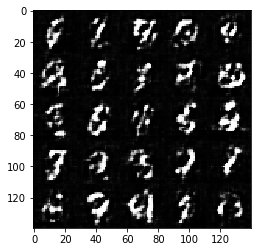

Iteration: 601
Iteration: 602
Iteration: 603
Iteration: 604
Iteration: 605
Iteration: 606
Iteration: 607
Iteration: 608
Iteration: 609
Iteration: 610
Epoch 0/2... Discriminator Loss: 0.6150... Generator Loss: 1.1463
Iteration: 611
Iteration: 612
Iteration: 613
Iteration: 614
Iteration: 615
Iteration: 616
Iteration: 617
Iteration: 618
Iteration: 619
Iteration: 620
Epoch 0/2... Discriminator Loss: 0.3916... Generator Loss: 1.8679
Iteration: 621
Iteration: 622
Iteration: 623
Iteration: 624
Iteration: 625
Iteration: 626
Iteration: 627
Iteration: 628
Iteration: 629
Iteration: 630
Epoch 0/2... Discriminator Loss: 0.4927... Generator Loss: 1.2228
Iteration: 631
Iteration: 632
Iteration: 633
Iteration: 634
Iteration: 635
Iteration: 636
Iteration: 637
Iteration: 638
Iteration: 639
Iteration: 640
Epoch 0/2... Discriminator Loss: 0.4196... Generator Loss: 1.7807
Iteration: 641
Iteration: 642
Iteration: 643
Iteration: 644
Iteration: 645
Iteration: 646
Iteration: 647
Iteration: 648
Iteration: 649
I

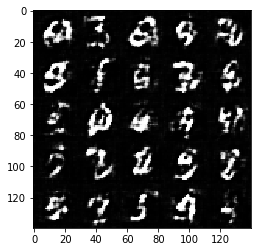

Iteration: 651
Iteration: 652
Iteration: 653
Iteration: 654
Iteration: 655
Iteration: 656
Iteration: 657
Iteration: 658
Iteration: 659
Iteration: 660
Epoch 0/2... Discriminator Loss: 0.5542... Generator Loss: 1.3436
Iteration: 661
Iteration: 662
Iteration: 663
Iteration: 664
Iteration: 665
Iteration: 666
Iteration: 667
Iteration: 668
Iteration: 669
Iteration: 670
Epoch 0/2... Discriminator Loss: 0.3782... Generator Loss: 1.8628
Iteration: 671
Iteration: 672
Iteration: 673
Iteration: 674
Iteration: 675
Iteration: 676
Iteration: 677
Iteration: 678
Iteration: 679
Iteration: 680
Epoch 0/2... Discriminator Loss: 0.5546... Generator Loss: 1.7213
Iteration: 681
Iteration: 682
Iteration: 683
Iteration: 684
Iteration: 685
Iteration: 686
Iteration: 687
Iteration: 688
Iteration: 689
Iteration: 690
Epoch 0/2... Discriminator Loss: 0.4364... Generator Loss: 1.9501
Iteration: 691
Iteration: 692
Iteration: 693
Iteration: 694
Iteration: 695
Iteration: 696
Iteration: 697
Iteration: 698
Iteration: 699
I

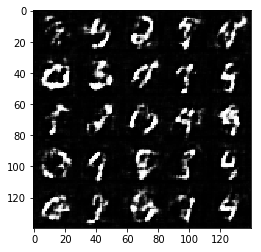

Iteration: 701
Iteration: 702
Iteration: 703
Iteration: 704
Iteration: 705
Iteration: 706
Iteration: 707
Iteration: 708
Iteration: 709
Iteration: 710
Epoch 0/2... Discriminator Loss: 1.3973... Generator Loss: 0.4664
Iteration: 711
Iteration: 712
Iteration: 713
Iteration: 714
Iteration: 715
Iteration: 716
Iteration: 717
Iteration: 718
Iteration: 719
Iteration: 720
Epoch 0/2... Discriminator Loss: 0.5256... Generator Loss: 1.6426
Iteration: 721
Iteration: 722
Iteration: 723
Iteration: 724
Iteration: 725
Iteration: 726
Iteration: 727
Iteration: 728
Iteration: 729
Iteration: 730
Epoch 0/2... Discriminator Loss: 0.6712... Generator Loss: 1.0612
Iteration: 731
Iteration: 732
Iteration: 733
Iteration: 734
Iteration: 735
Iteration: 736
Iteration: 737
Iteration: 738
Iteration: 739
Iteration: 740
Epoch 0/2... Discriminator Loss: 0.4682... Generator Loss: 2.0901
Iteration: 741
Iteration: 742
Iteration: 743
Iteration: 744
Iteration: 745
Iteration: 746
Iteration: 747
Iteration: 748
Iteration: 749
I

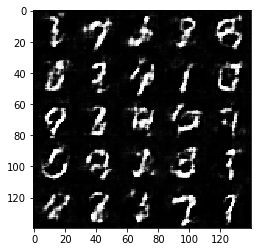

Iteration: 751
Iteration: 752
Iteration: 753
Iteration: 754
Iteration: 755
Iteration: 756
Iteration: 757
Iteration: 758
Iteration: 759
Iteration: 760
Epoch 0/2... Discriminator Loss: 0.6342... Generator Loss: 1.1433
Iteration: 761
Iteration: 762
Iteration: 763
Iteration: 764
Iteration: 765
Iteration: 766
Iteration: 767
Iteration: 768
Iteration: 769
Iteration: 770
Epoch 0/2... Discriminator Loss: 0.6129... Generator Loss: 1.1407
Iteration: 771
Iteration: 772
Iteration: 773
Iteration: 774
Iteration: 775
Iteration: 776
Iteration: 777
Iteration: 778
Iteration: 779
Iteration: 780
Epoch 0/2... Discriminator Loss: 1.0321... Generator Loss: 0.6041
Iteration: 781
Iteration: 782
Iteration: 783
Iteration: 784
Iteration: 785
Iteration: 786
Iteration: 787
Iteration: 788
Iteration: 789
Iteration: 790
Epoch 0/2... Discriminator Loss: 1.2826... Generator Loss: 0.4519
Iteration: 791
Iteration: 792
Iteration: 793
Iteration: 794
Iteration: 795
Iteration: 796
Iteration: 797
Iteration: 798
Iteration: 799
I

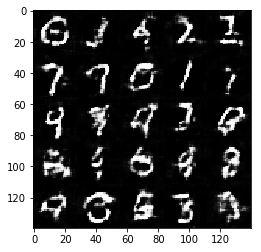

Iteration: 801
Iteration: 802
Iteration: 803
Iteration: 804
Iteration: 805
Iteration: 806
Iteration: 807
Iteration: 808
Iteration: 809
Iteration: 810
Epoch 0/2... Discriminator Loss: 0.7352... Generator Loss: 1.0789
Iteration: 811
Iteration: 812
Iteration: 813
Iteration: 814
Iteration: 815
Iteration: 816
Iteration: 817
Iteration: 818
Iteration: 819
Iteration: 820
Epoch 0/2... Discriminator Loss: 0.7027... Generator Loss: 2.3165
Iteration: 821
Iteration: 822
Iteration: 823
Iteration: 824
Iteration: 825
Iteration: 826
Iteration: 827
Iteration: 828
Iteration: 829
Iteration: 830
Epoch 0/2... Discriminator Loss: 0.5668... Generator Loss: 1.1619
Iteration: 831
Iteration: 832
Iteration: 833
Iteration: 834
Iteration: 835
Iteration: 836
Iteration: 837
Iteration: 838
Iteration: 839
Iteration: 840
Epoch 0/2... Discriminator Loss: 0.7901... Generator Loss: 0.8799
Iteration: 841
Iteration: 842
Iteration: 843
Iteration: 844
Iteration: 845
Iteration: 846
Iteration: 847
Iteration: 848
Iteration: 849
I

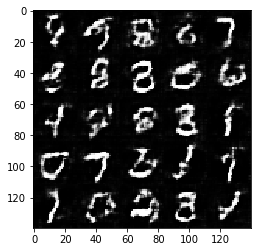

Iteration: 851
Iteration: 852
Iteration: 853
Iteration: 854
Iteration: 855
Iteration: 856
Iteration: 857
Iteration: 858
Iteration: 859
Iteration: 860
Epoch 0/2... Discriminator Loss: 0.8662... Generator Loss: 1.2225
Iteration: 861
Iteration: 862
Iteration: 863
Iteration: 864
Iteration: 865
Iteration: 866
Iteration: 867
Iteration: 868
Iteration: 869
Iteration: 870
Epoch 0/2... Discriminator Loss: 0.8081... Generator Loss: 1.5964
Iteration: 871
Iteration: 872
Iteration: 873
Iteration: 874
Iteration: 875
Iteration: 876
Iteration: 877
Iteration: 878
Iteration: 879
Iteration: 880
Epoch 0/2... Discriminator Loss: 0.7032... Generator Loss: 1.1890
Iteration: 881
Iteration: 882
Iteration: 883
Iteration: 884
Iteration: 885
Iteration: 886
Iteration: 887
Iteration: 888
Iteration: 889
Iteration: 890
Epoch 0/2... Discriminator Loss: 0.6396... Generator Loss: 1.5256
Iteration: 891
Iteration: 892
Iteration: 893
Iteration: 894
Iteration: 895
Iteration: 896
Iteration: 897
Iteration: 898
Iteration: 899
I

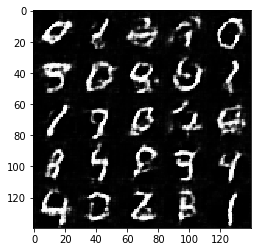

Iteration: 901
Iteration: 902
Iteration: 903
Iteration: 904
Iteration: 905
Iteration: 906
Iteration: 907
Iteration: 908
Iteration: 909
Iteration: 910
Epoch 0/2... Discriminator Loss: 0.8242... Generator Loss: 0.7844
Iteration: 911
Iteration: 912
Iteration: 913
Iteration: 914
Iteration: 915
Iteration: 916
Iteration: 917
Iteration: 918
Iteration: 919
Iteration: 920
Epoch 0/2... Discriminator Loss: 0.6728... Generator Loss: 1.0818
Iteration: 921
Iteration: 922
Iteration: 923
Iteration: 924
Iteration: 925
Iteration: 926
Iteration: 927
Iteration: 928
Iteration: 929
Iteration: 930
Epoch 0/2... Discriminator Loss: 0.5810... Generator Loss: 1.2198
Iteration: 931
Iteration: 932
Iteration: 933
Iteration: 934
Iteration: 935
Iteration: 936
Iteration: 937
Iteration: 938
Iteration: 939
Iteration: 940
Epoch 1/2... Discriminator Loss: 0.6512... Generator Loss: 1.2124
Iteration: 941
Iteration: 942
Iteration: 943
Iteration: 944
Iteration: 945
Iteration: 946
Iteration: 947
Iteration: 948
Iteration: 949
I

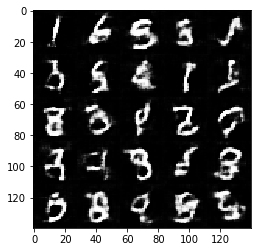

Iteration: 951
Iteration: 952
Iteration: 953
Iteration: 954
Iteration: 955
Iteration: 956
Iteration: 957
Iteration: 958
Iteration: 959
Iteration: 960
Epoch 1/2... Discriminator Loss: 0.6331... Generator Loss: 1.2021
Iteration: 961
Iteration: 962
Iteration: 963
Iteration: 964
Iteration: 965
Iteration: 966
Iteration: 967
Iteration: 968
Iteration: 969
Iteration: 970
Epoch 1/2... Discriminator Loss: 1.0549... Generator Loss: 0.6622
Iteration: 971
Iteration: 972
Iteration: 973
Iteration: 974
Iteration: 975
Iteration: 976
Iteration: 977
Iteration: 978
Iteration: 979
Iteration: 980
Epoch 1/2... Discriminator Loss: 0.6091... Generator Loss: 1.5513
Iteration: 981
Iteration: 982
Iteration: 983
Iteration: 984
Iteration: 985
Iteration: 986
Iteration: 987
Iteration: 988
Iteration: 989
Iteration: 990
Epoch 1/2... Discriminator Loss: 1.0486... Generator Loss: 1.9204
Iteration: 991
Iteration: 992
Iteration: 993
Iteration: 994
Iteration: 995
Iteration: 996
Iteration: 997
Iteration: 998
Iteration: 999
I

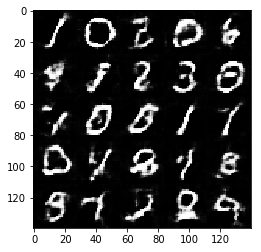

Iteration: 1001
Iteration: 1002
Iteration: 1003
Iteration: 1004
Iteration: 1005
Iteration: 1006
Iteration: 1007
Iteration: 1008
Iteration: 1009
Iteration: 1010
Epoch 1/2... Discriminator Loss: 0.6907... Generator Loss: 1.1867
Iteration: 1011
Iteration: 1012
Iteration: 1013
Iteration: 1014
Iteration: 1015
Iteration: 1016
Iteration: 1017
Iteration: 1018
Iteration: 1019
Iteration: 1020
Epoch 1/2... Discriminator Loss: 0.5516... Generator Loss: 1.4589
Iteration: 1021
Iteration: 1022
Iteration: 1023
Iteration: 1024
Iteration: 1025
Iteration: 1026
Iteration: 1027
Iteration: 1028
Iteration: 1029
Iteration: 1030
Epoch 1/2... Discriminator Loss: 0.6549... Generator Loss: 1.1285
Iteration: 1031
Iteration: 1032
Iteration: 1033
Iteration: 1034
Iteration: 1035
Iteration: 1036
Iteration: 1037
Iteration: 1038
Iteration: 1039
Iteration: 1040
Epoch 1/2... Discriminator Loss: 0.8761... Generator Loss: 0.8236
Iteration: 1041
Iteration: 1042
Iteration: 1043
Iteration: 1044
Iteration: 1045
Iteration: 1046


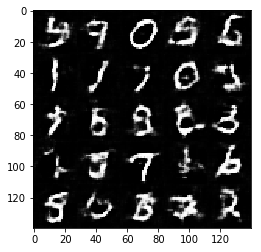

Iteration: 1051
Iteration: 1052
Iteration: 1053
Iteration: 1054
Iteration: 1055
Iteration: 1056
Iteration: 1057
Iteration: 1058
Iteration: 1059
Iteration: 1060
Epoch 1/2... Discriminator Loss: 0.5863... Generator Loss: 1.3950
Iteration: 1061
Iteration: 1062
Iteration: 1063
Iteration: 1064
Iteration: 1065
Iteration: 1066
Iteration: 1067
Iteration: 1068
Iteration: 1069
Iteration: 1070
Epoch 1/2... Discriminator Loss: 0.9812... Generator Loss: 2.0931
Iteration: 1071
Iteration: 1072
Iteration: 1073
Iteration: 1074
Iteration: 1075
Iteration: 1076
Iteration: 1077
Iteration: 1078
Iteration: 1079
Iteration: 1080
Epoch 1/2... Discriminator Loss: 0.8521... Generator Loss: 0.9371
Iteration: 1081
Iteration: 1082
Iteration: 1083
Iteration: 1084
Iteration: 1085
Iteration: 1086
Iteration: 1087
Iteration: 1088
Iteration: 1089
Iteration: 1090
Epoch 1/2... Discriminator Loss: 0.7253... Generator Loss: 0.9640
Iteration: 1091
Iteration: 1092
Iteration: 1093
Iteration: 1094
Iteration: 1095
Iteration: 1096


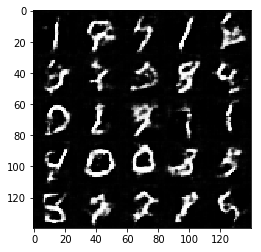

Iteration: 1101
Iteration: 1102
Iteration: 1103
Iteration: 1104
Iteration: 1105
Iteration: 1106
Iteration: 1107
Iteration: 1108
Iteration: 1109
Iteration: 1110
Epoch 1/2... Discriminator Loss: 0.5651... Generator Loss: 1.3932
Iteration: 1111
Iteration: 1112
Iteration: 1113
Iteration: 1114
Iteration: 1115
Iteration: 1116
Iteration: 1117
Iteration: 1118
Iteration: 1119
Iteration: 1120
Epoch 1/2... Discriminator Loss: 0.6011... Generator Loss: 1.5150
Iteration: 1121
Iteration: 1122
Iteration: 1123
Iteration: 1124
Iteration: 1125
Iteration: 1126
Iteration: 1127
Iteration: 1128
Iteration: 1129
Iteration: 1130
Epoch 1/2... Discriminator Loss: 0.7460... Generator Loss: 1.9947
Iteration: 1131
Iteration: 1132
Iteration: 1133
Iteration: 1134
Iteration: 1135
Iteration: 1136
Iteration: 1137
Iteration: 1138
Iteration: 1139
Iteration: 1140
Epoch 1/2... Discriminator Loss: 0.7097... Generator Loss: 1.6869
Iteration: 1141
Iteration: 1142
Iteration: 1143
Iteration: 1144
Iteration: 1145
Iteration: 1146


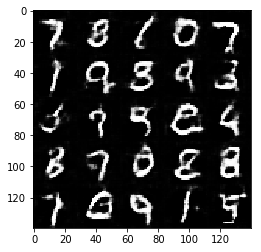

Iteration: 1151
Iteration: 1152
Iteration: 1153
Iteration: 1154
Iteration: 1155
Iteration: 1156
Iteration: 1157
Iteration: 1158
Iteration: 1159
Iteration: 1160
Epoch 1/2... Discriminator Loss: 0.5574... Generator Loss: 1.3889
Iteration: 1161
Iteration: 1162
Iteration: 1163
Iteration: 1164
Iteration: 1165
Iteration: 1166
Iteration: 1167
Iteration: 1168
Iteration: 1169
Iteration: 1170
Epoch 1/2... Discriminator Loss: 0.7195... Generator Loss: 1.0576
Iteration: 1171
Iteration: 1172
Iteration: 1173
Iteration: 1174
Iteration: 1175
Iteration: 1176
Iteration: 1177
Iteration: 1178
Iteration: 1179
Iteration: 1180
Epoch 1/2... Discriminator Loss: 0.8909... Generator Loss: 0.7555
Iteration: 1181
Iteration: 1182
Iteration: 1183
Iteration: 1184
Iteration: 1185
Iteration: 1186
Iteration: 1187
Iteration: 1188
Iteration: 1189
Iteration: 1190
Epoch 1/2... Discriminator Loss: 0.6481... Generator Loss: 1.1250
Iteration: 1191
Iteration: 1192
Iteration: 1193
Iteration: 1194
Iteration: 1195
Iteration: 1196


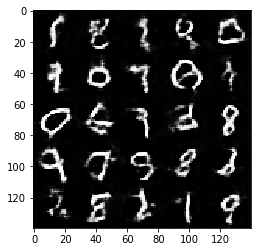

Iteration: 1201
Iteration: 1202
Iteration: 1203
Iteration: 1204
Iteration: 1205
Iteration: 1206
Iteration: 1207
Iteration: 1208
Iteration: 1209
Iteration: 1210
Epoch 1/2... Discriminator Loss: 0.5528... Generator Loss: 1.9390
Iteration: 1211
Iteration: 1212
Iteration: 1213
Iteration: 1214
Iteration: 1215
Iteration: 1216
Iteration: 1217
Iteration: 1218
Iteration: 1219
Iteration: 1220
Epoch 1/2... Discriminator Loss: 0.8755... Generator Loss: 2.2633
Iteration: 1221
Iteration: 1222
Iteration: 1223
Iteration: 1224
Iteration: 1225
Iteration: 1226
Iteration: 1227
Iteration: 1228
Iteration: 1229
Iteration: 1230
Epoch 1/2... Discriminator Loss: 1.2936... Generator Loss: 0.4624
Iteration: 1231
Iteration: 1232
Iteration: 1233
Iteration: 1234
Iteration: 1235
Iteration: 1236
Iteration: 1237
Iteration: 1238
Iteration: 1239
Iteration: 1240
Epoch 1/2... Discriminator Loss: 0.7035... Generator Loss: 1.1783
Iteration: 1241
Iteration: 1242
Iteration: 1243
Iteration: 1244
Iteration: 1245
Iteration: 1246


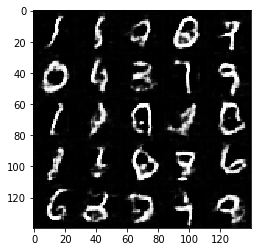

Iteration: 1251
Iteration: 1252
Iteration: 1253
Iteration: 1254
Iteration: 1255
Iteration: 1256
Iteration: 1257
Iteration: 1258
Iteration: 1259
Iteration: 1260
Epoch 1/2... Discriminator Loss: 0.6375... Generator Loss: 1.6600
Iteration: 1261
Iteration: 1262
Iteration: 1263
Iteration: 1264
Iteration: 1265
Iteration: 1266
Iteration: 1267
Iteration: 1268
Iteration: 1269
Iteration: 1270
Epoch 1/2... Discriminator Loss: 0.8006... Generator Loss: 1.0658
Iteration: 1271
Iteration: 1272
Iteration: 1273
Iteration: 1274
Iteration: 1275
Iteration: 1276
Iteration: 1277
Iteration: 1278
Iteration: 1279
Iteration: 1280
Epoch 1/2... Discriminator Loss: 1.0042... Generator Loss: 0.6084
Iteration: 1281
Iteration: 1282
Iteration: 1283
Iteration: 1284
Iteration: 1285
Iteration: 1286
Iteration: 1287
Iteration: 1288
Iteration: 1289
Iteration: 1290
Epoch 1/2... Discriminator Loss: 0.7041... Generator Loss: 1.8985
Iteration: 1291
Iteration: 1292
Iteration: 1293
Iteration: 1294
Iteration: 1295
Iteration: 1296


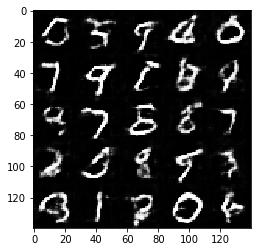

Iteration: 1301
Iteration: 1302
Iteration: 1303
Iteration: 1304
Iteration: 1305
Iteration: 1306
Iteration: 1307
Iteration: 1308
Iteration: 1309
Iteration: 1310
Epoch 1/2... Discriminator Loss: 0.6576... Generator Loss: 1.1025
Iteration: 1311
Iteration: 1312
Iteration: 1313
Iteration: 1314
Iteration: 1315
Iteration: 1316
Iteration: 1317
Iteration: 1318
Iteration: 1319
Iteration: 1320
Epoch 1/2... Discriminator Loss: 1.1956... Generator Loss: 1.8577
Iteration: 1321
Iteration: 1322
Iteration: 1323
Iteration: 1324
Iteration: 1325
Iteration: 1326
Iteration: 1327
Iteration: 1328
Iteration: 1329
Iteration: 1330
Epoch 1/2... Discriminator Loss: 0.7587... Generator Loss: 1.0706
Iteration: 1331
Iteration: 1332
Iteration: 1333
Iteration: 1334
Iteration: 1335
Iteration: 1336
Iteration: 1337
Iteration: 1338
Iteration: 1339
Iteration: 1340
Epoch 1/2... Discriminator Loss: 0.6118... Generator Loss: 1.5739
Iteration: 1341
Iteration: 1342
Iteration: 1343
Iteration: 1344
Iteration: 1345
Iteration: 1346


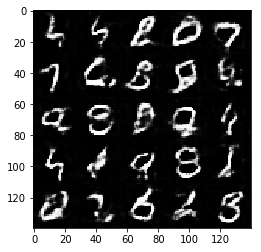

Iteration: 1351
Iteration: 1352
Iteration: 1353
Iteration: 1354
Iteration: 1355
Iteration: 1356
Iteration: 1357
Iteration: 1358
Iteration: 1359
Iteration: 1360
Epoch 1/2... Discriminator Loss: 0.7652... Generator Loss: 1.0668
Iteration: 1361
Iteration: 1362
Iteration: 1363
Iteration: 1364
Iteration: 1365
Iteration: 1366
Iteration: 1367
Iteration: 1368
Iteration: 1369
Iteration: 1370
Epoch 1/2... Discriminator Loss: 0.7904... Generator Loss: 2.4502
Iteration: 1371
Iteration: 1372
Iteration: 1373
Iteration: 1374
Iteration: 1375
Iteration: 1376
Iteration: 1377
Iteration: 1378
Iteration: 1379
Iteration: 1380
Epoch 1/2... Discriminator Loss: 0.5297... Generator Loss: 1.5315
Iteration: 1381
Iteration: 1382
Iteration: 1383
Iteration: 1384
Iteration: 1385
Iteration: 1386
Iteration: 1387
Iteration: 1388
Iteration: 1389
Iteration: 1390
Epoch 1/2... Discriminator Loss: 0.6214... Generator Loss: 1.6876
Iteration: 1391
Iteration: 1392
Iteration: 1393
Iteration: 1394
Iteration: 1395
Iteration: 1396


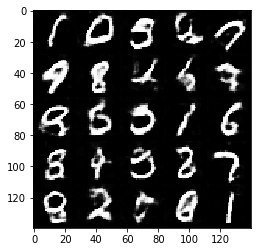

Iteration: 1401
Iteration: 1402
Iteration: 1403
Iteration: 1404
Iteration: 1405
Iteration: 1406
Iteration: 1407
Iteration: 1408
Iteration: 1409
Iteration: 1410
Epoch 1/2... Discriminator Loss: 0.6874... Generator Loss: 1.3456
Iteration: 1411
Iteration: 1412
Iteration: 1413
Iteration: 1414
Iteration: 1415
Iteration: 1416
Iteration: 1417
Iteration: 1418
Iteration: 1419
Iteration: 1420
Epoch 1/2... Discriminator Loss: 0.7210... Generator Loss: 1.6932
Iteration: 1421
Iteration: 1422
Iteration: 1423
Iteration: 1424
Iteration: 1425
Iteration: 1426
Iteration: 1427
Iteration: 1428
Iteration: 1429
Iteration: 1430
Epoch 1/2... Discriminator Loss: 0.8870... Generator Loss: 0.8774
Iteration: 1431
Iteration: 1432
Iteration: 1433
Iteration: 1434
Iteration: 1435
Iteration: 1436
Iteration: 1437
Iteration: 1438
Iteration: 1439
Iteration: 1440
Epoch 1/2... Discriminator Loss: 0.5000... Generator Loss: 1.3847
Iteration: 1441
Iteration: 1442
Iteration: 1443
Iteration: 1444
Iteration: 1445
Iteration: 1446


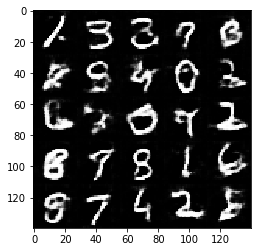

Iteration: 1451
Iteration: 1452
Iteration: 1453
Iteration: 1454
Iteration: 1455
Iteration: 1456
Iteration: 1457
Iteration: 1458
Iteration: 1459
Iteration: 1460
Epoch 1/2... Discriminator Loss: 0.6655... Generator Loss: 1.2549
Iteration: 1461
Iteration: 1462
Iteration: 1463
Iteration: 1464
Iteration: 1465
Iteration: 1466
Iteration: 1467
Iteration: 1468
Iteration: 1469
Iteration: 1470
Epoch 1/2... Discriminator Loss: 0.6164... Generator Loss: 1.3152
Iteration: 1471
Iteration: 1472
Iteration: 1473
Iteration: 1474
Iteration: 1475
Iteration: 1476
Iteration: 1477
Iteration: 1478
Iteration: 1479
Iteration: 1480
Epoch 1/2... Discriminator Loss: 0.6439... Generator Loss: 1.3707
Iteration: 1481
Iteration: 1482
Iteration: 1483
Iteration: 1484
Iteration: 1485
Iteration: 1486
Iteration: 1487
Iteration: 1488
Iteration: 1489
Iteration: 1490
Epoch 1/2... Discriminator Loss: 0.6234... Generator Loss: 1.7888
Iteration: 1491
Iteration: 1492
Iteration: 1493
Iteration: 1494
Iteration: 1495
Iteration: 1496


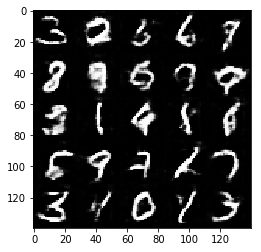

Iteration: 1501
Iteration: 1502
Iteration: 1503
Iteration: 1504
Iteration: 1505
Iteration: 1506
Iteration: 1507
Iteration: 1508
Iteration: 1509
Iteration: 1510
Epoch 1/2... Discriminator Loss: 0.9532... Generator Loss: 0.6761
Iteration: 1511
Iteration: 1512
Iteration: 1513
Iteration: 1514
Iteration: 1515
Iteration: 1516
Iteration: 1517
Iteration: 1518
Iteration: 1519
Iteration: 1520
Epoch 1/2... Discriminator Loss: 0.6514... Generator Loss: 1.1118
Iteration: 1521
Iteration: 1522
Iteration: 1523
Iteration: 1524
Iteration: 1525
Iteration: 1526
Iteration: 1527
Iteration: 1528
Iteration: 1529
Iteration: 1530
Epoch 1/2... Discriminator Loss: 0.5511... Generator Loss: 1.3444
Iteration: 1531
Iteration: 1532
Iteration: 1533
Iteration: 1534
Iteration: 1535
Iteration: 1536
Iteration: 1537
Iteration: 1538
Iteration: 1539
Iteration: 1540
Epoch 1/2... Discriminator Loss: 0.5924... Generator Loss: 1.2656
Iteration: 1541
Iteration: 1542
Iteration: 1543
Iteration: 1544
Iteration: 1545
Iteration: 1546


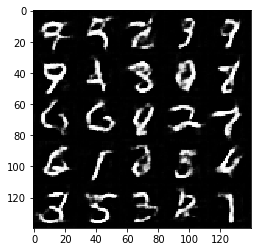

Iteration: 1551
Iteration: 1552
Iteration: 1553
Iteration: 1554
Iteration: 1555
Iteration: 1556
Iteration: 1557
Iteration: 1558
Iteration: 1559
Iteration: 1560
Epoch 1/2... Discriminator Loss: 0.9575... Generator Loss: 2.1569
Iteration: 1561
Iteration: 1562
Iteration: 1563
Iteration: 1564
Iteration: 1565
Iteration: 1566
Iteration: 1567
Iteration: 1568
Iteration: 1569
Iteration: 1570
Epoch 1/2... Discriminator Loss: 0.7334... Generator Loss: 1.2949
Iteration: 1571
Iteration: 1572
Iteration: 1573
Iteration: 1574
Iteration: 1575
Iteration: 1576
Iteration: 1577
Iteration: 1578
Iteration: 1579
Iteration: 1580
Epoch 1/2... Discriminator Loss: 0.7205... Generator Loss: 1.8087
Iteration: 1581
Iteration: 1582
Iteration: 1583
Iteration: 1584
Iteration: 1585
Iteration: 1586
Iteration: 1587
Iteration: 1588
Iteration: 1589
Iteration: 1590
Epoch 1/2... Discriminator Loss: 0.9286... Generator Loss: 1.1675
Iteration: 1591
Iteration: 1592
Iteration: 1593
Iteration: 1594
Iteration: 1595
Iteration: 1596


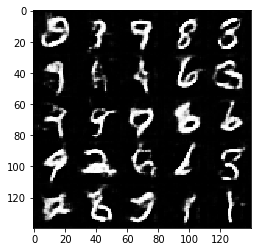

Iteration: 1601
Iteration: 1602
Iteration: 1603
Iteration: 1604
Iteration: 1605
Iteration: 1606
Iteration: 1607
Iteration: 1608
Iteration: 1609
Iteration: 1610
Epoch 1/2... Discriminator Loss: 0.7155... Generator Loss: 1.0793
Iteration: 1611
Iteration: 1612
Iteration: 1613
Iteration: 1614
Iteration: 1615
Iteration: 1616
Iteration: 1617
Iteration: 1618
Iteration: 1619
Iteration: 1620
Epoch 1/2... Discriminator Loss: 0.7601... Generator Loss: 0.9329
Iteration: 1621
Iteration: 1622
Iteration: 1623
Iteration: 1624
Iteration: 1625
Iteration: 1626
Iteration: 1627
Iteration: 1628
Iteration: 1629
Iteration: 1630
Epoch 1/2... Discriminator Loss: 1.0556... Generator Loss: 0.6045
Iteration: 1631
Iteration: 1632
Iteration: 1633
Iteration: 1634
Iteration: 1635
Iteration: 1636
Iteration: 1637
Iteration: 1638
Iteration: 1639
Iteration: 1640
Epoch 1/2... Discriminator Loss: 0.7172... Generator Loss: 0.9781
Iteration: 1641
Iteration: 1642
Iteration: 1643
Iteration: 1644
Iteration: 1645
Iteration: 1646


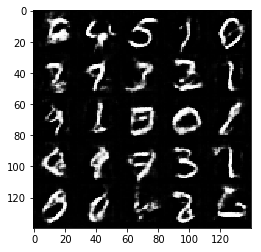

Iteration: 1651
Iteration: 1652
Iteration: 1653
Iteration: 1654
Iteration: 1655
Iteration: 1656
Iteration: 1657
Iteration: 1658
Iteration: 1659
Iteration: 1660
Epoch 1/2... Discriminator Loss: 0.5779... Generator Loss: 1.5585
Iteration: 1661
Iteration: 1662
Iteration: 1663
Iteration: 1664
Iteration: 1665
Iteration: 1666
Iteration: 1667
Iteration: 1668
Iteration: 1669
Iteration: 1670
Epoch 1/2... Discriminator Loss: 0.6910... Generator Loss: 1.8994
Iteration: 1671
Iteration: 1672
Iteration: 1673
Iteration: 1674
Iteration: 1675
Iteration: 1676
Iteration: 1677
Iteration: 1678
Iteration: 1679
Iteration: 1680
Epoch 1/2... Discriminator Loss: 0.4641... Generator Loss: 1.6680
Iteration: 1681
Iteration: 1682
Iteration: 1683
Iteration: 1684
Iteration: 1685
Iteration: 1686
Iteration: 1687
Iteration: 1688
Iteration: 1689
Iteration: 1690
Epoch 1/2... Discriminator Loss: 0.6429... Generator Loss: 1.0642
Iteration: 1691
Iteration: 1692
Iteration: 1693
Iteration: 1694
Iteration: 1695
Iteration: 1696


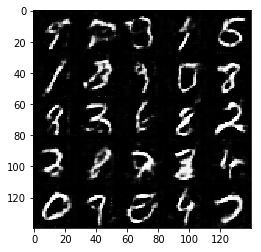

Iteration: 1701
Iteration: 1702
Iteration: 1703
Iteration: 1704
Iteration: 1705
Iteration: 1706
Iteration: 1707
Iteration: 1708
Iteration: 1709
Iteration: 1710
Epoch 1/2... Discriminator Loss: 0.8018... Generator Loss: 1.0581
Iteration: 1711
Iteration: 1712
Iteration: 1713
Iteration: 1714
Iteration: 1715
Iteration: 1716
Iteration: 1717
Iteration: 1718
Iteration: 1719
Iteration: 1720
Epoch 1/2... Discriminator Loss: 0.9180... Generator Loss: 0.7733
Iteration: 1721
Iteration: 1722
Iteration: 1723
Iteration: 1724
Iteration: 1725
Iteration: 1726
Iteration: 1727
Iteration: 1728
Iteration: 1729
Iteration: 1730
Epoch 1/2... Discriminator Loss: 0.8265... Generator Loss: 0.8306
Iteration: 1731
Iteration: 1732
Iteration: 1733
Iteration: 1734
Iteration: 1735
Iteration: 1736
Iteration: 1737
Iteration: 1738
Iteration: 1739
Iteration: 1740
Epoch 1/2... Discriminator Loss: 0.6945... Generator Loss: 1.1162
Iteration: 1741
Iteration: 1742
Iteration: 1743
Iteration: 1744
Iteration: 1745
Iteration: 1746


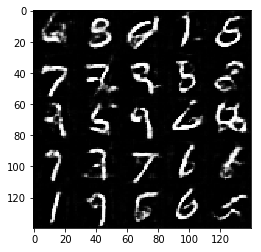

Iteration: 1751
Iteration: 1752
Iteration: 1753
Iteration: 1754
Iteration: 1755
Iteration: 1756
Iteration: 1757
Iteration: 1758
Iteration: 1759
Iteration: 1760
Epoch 1/2... Discriminator Loss: 0.7118... Generator Loss: 2.4410
Iteration: 1761
Iteration: 1762
Iteration: 1763
Iteration: 1764
Iteration: 1765
Iteration: 1766
Iteration: 1767
Iteration: 1768
Iteration: 1769
Iteration: 1770
Epoch 1/2... Discriminator Loss: 0.5632... Generator Loss: 1.3422
Iteration: 1771
Iteration: 1772
Iteration: 1773
Iteration: 1774
Iteration: 1775
Iteration: 1776
Iteration: 1777
Iteration: 1778
Iteration: 1779
Iteration: 1780
Epoch 1/2... Discriminator Loss: 0.5992... Generator Loss: 1.8252
Iteration: 1781
Iteration: 1782
Iteration: 1783
Iteration: 1784
Iteration: 1785
Iteration: 1786
Iteration: 1787
Iteration: 1788
Iteration: 1789
Iteration: 1790
Epoch 1/2... Discriminator Loss: 0.3437... Generator Loss: 2.4366
Iteration: 1791
Iteration: 1792
Iteration: 1793
Iteration: 1794
Iteration: 1795
Iteration: 1796


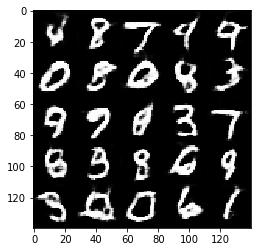

Iteration: 1801
Iteration: 1802
Iteration: 1803
Iteration: 1804
Iteration: 1805
Iteration: 1806
Iteration: 1807
Iteration: 1808
Iteration: 1809
Iteration: 1810
Epoch 1/2... Discriminator Loss: 0.7048... Generator Loss: 1.0689
Iteration: 1811
Iteration: 1812
Iteration: 1813
Iteration: 1814
Iteration: 1815
Iteration: 1816
Iteration: 1817
Iteration: 1818
Iteration: 1819
Iteration: 1820
Epoch 1/2... Discriminator Loss: 0.9489... Generator Loss: 0.7452
Iteration: 1821
Iteration: 1822
Iteration: 1823
Iteration: 1824
Iteration: 1825
Iteration: 1826
Iteration: 1827
Iteration: 1828
Iteration: 1829
Iteration: 1830
Epoch 1/2... Discriminator Loss: 0.6224... Generator Loss: 1.8243
Iteration: 1831
Iteration: 1832
Iteration: 1833
Iteration: 1834
Iteration: 1835
Iteration: 1836
Iteration: 1837
Iteration: 1838
Iteration: 1839
Iteration: 1840
Epoch 1/2... Discriminator Loss: 0.6668... Generator Loss: 1.2946
Iteration: 1841
Iteration: 1842
Iteration: 1843
Iteration: 1844
Iteration: 1845
Iteration: 1846


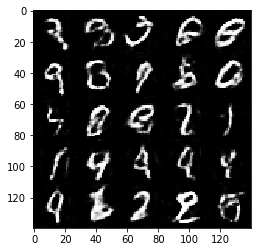

Iteration: 1851
Iteration: 1852
Iteration: 1853
Iteration: 1854
Iteration: 1855
Iteration: 1856
Iteration: 1857
Iteration: 1858
Iteration: 1859
Iteration: 1860
Epoch 1/2... Discriminator Loss: 0.8580... Generator Loss: 2.0206
Iteration: 1861
Iteration: 1862
Iteration: 1863
Iteration: 1864
Iteration: 1865
Iteration: 1866
Iteration: 1867
Iteration: 1868
Iteration: 1869
Iteration: 1870
Epoch 1/2... Discriminator Loss: 0.6192... Generator Loss: 1.1681
Iteration: 1871
Iteration: 1872
Iteration: 1873
Iteration: 1874


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Epoch 0/1... Discriminator Loss: 1.3286... Generator Loss: 0.4885
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Epoch 0/1... Discriminator Loss: 0.9309... Generator Loss: 0.7246
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Epoch 0/1... Discriminator Loss: 0.5198... Generator Loss: 1.3636
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Epoch 0/1... Discriminator Loss: 0.3148... Generator Loss: 1.6649
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Epoch 0/1... Discriminator Loss: 0.2577... Ge

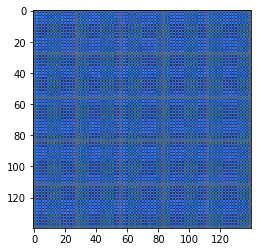

Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Epoch 0/1... Discriminator Loss: 0.2212... Generator Loss: 1.9113
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Epoch 0/1... Discriminator Loss: 0.1590... Generator Loss: 2.3771
Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
Epoch 0/1... Discriminator Loss: 0.1080... Generator Loss: 2.8403
Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
Epoch 0/1... Discriminator Loss: 0.1986... Generator Loss: 2.1105
Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
Epoch 0/1... Discriminator Loss: 0.

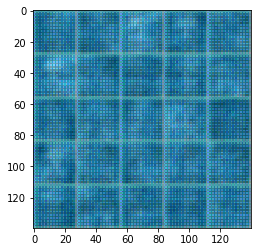

Iteration: 101
Iteration: 102
Iteration: 103
Iteration: 104
Iteration: 105
Iteration: 106
Iteration: 107
Iteration: 108
Iteration: 109
Iteration: 110
Epoch 0/1... Discriminator Loss: 0.6466... Generator Loss: 0.8701
Iteration: 111
Iteration: 112
Iteration: 113
Iteration: 114
Iteration: 115
Iteration: 116
Iteration: 117
Iteration: 118
Iteration: 119
Iteration: 120
Epoch 0/1... Discriminator Loss: 0.0198... Generator Loss: 4.7549
Iteration: 121
Iteration: 122
Iteration: 123
Iteration: 124
Iteration: 125
Iteration: 126
Iteration: 127
Iteration: 128
Iteration: 129
Iteration: 130
Epoch 0/1... Discriminator Loss: 0.0784... Generator Loss: 3.1309
Iteration: 131
Iteration: 132
Iteration: 133
Iteration: 134
Iteration: 135
Iteration: 136
Iteration: 137
Iteration: 138
Iteration: 139
Iteration: 140
Epoch 0/1... Discriminator Loss: 0.1823... Generator Loss: 2.4007
Iteration: 141
Iteration: 142
Iteration: 143
Iteration: 144
Iteration: 145
Iteration: 146
Iteration: 147
Iteration: 148
Iteration: 149
I

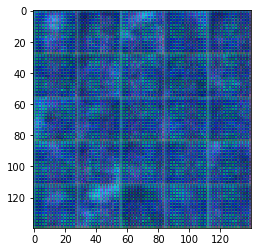

Iteration: 151
Iteration: 152
Iteration: 153
Iteration: 154
Iteration: 155
Iteration: 156
Iteration: 157
Iteration: 158
Iteration: 159
Iteration: 160
Epoch 0/1... Discriminator Loss: 0.0841... Generator Loss: 3.7917
Iteration: 161
Iteration: 162
Iteration: 163
Iteration: 164
Iteration: 165
Iteration: 166
Iteration: 167
Iteration: 168
Iteration: 169
Iteration: 170
Epoch 0/1... Discriminator Loss: 0.2882... Generator Loss: 1.8007
Iteration: 171
Iteration: 172
Iteration: 173
Iteration: 174
Iteration: 175
Iteration: 176
Iteration: 177
Iteration: 178
Iteration: 179
Iteration: 180
Epoch 0/1... Discriminator Loss: 0.4063... Generator Loss: 7.9410
Iteration: 181
Iteration: 182
Iteration: 183
Iteration: 184
Iteration: 185
Iteration: 186
Iteration: 187
Iteration: 188
Iteration: 189
Iteration: 190
Epoch 0/1... Discriminator Loss: 0.4165... Generator Loss: 1.6873
Iteration: 191
Iteration: 192
Iteration: 193
Iteration: 194
Iteration: 195
Iteration: 196
Iteration: 197
Iteration: 198
Iteration: 199
I

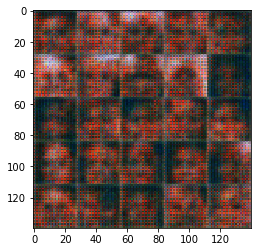

Iteration: 201
Iteration: 202
Iteration: 203
Iteration: 204
Iteration: 205
Iteration: 206
Iteration: 207
Iteration: 208
Iteration: 209
Iteration: 210
Epoch 0/1... Discriminator Loss: 1.0805... Generator Loss: 7.1351
Iteration: 211
Iteration: 212
Iteration: 213
Iteration: 214
Iteration: 215
Iteration: 216
Iteration: 217
Iteration: 218
Iteration: 219
Iteration: 220
Epoch 0/1... Discriminator Loss: 0.7611... Generator Loss: 0.8891
Iteration: 221
Iteration: 222
Iteration: 223
Iteration: 224
Iteration: 225
Iteration: 226
Iteration: 227
Iteration: 228
Iteration: 229
Iteration: 230
Epoch 0/1... Discriminator Loss: 1.5918... Generator Loss: 0.3018
Iteration: 231
Iteration: 232
Iteration: 233
Iteration: 234
Iteration: 235
Iteration: 236
Iteration: 237
Iteration: 238
Iteration: 239
Iteration: 240
Epoch 0/1... Discriminator Loss: 0.3559... Generator Loss: 1.6962
Iteration: 241
Iteration: 242
Iteration: 243
Iteration: 244
Iteration: 245
Iteration: 246
Iteration: 247
Iteration: 248
Iteration: 249
I

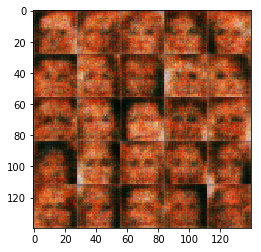

Iteration: 251
Iteration: 252
Iteration: 253
Iteration: 254
Iteration: 255
Iteration: 256
Iteration: 257
Iteration: 258
Iteration: 259
Iteration: 260
Epoch 0/1... Discriminator Loss: 0.7884... Generator Loss: 0.9063
Iteration: 261
Iteration: 262
Iteration: 263
Iteration: 264
Iteration: 265
Iteration: 266
Iteration: 267
Iteration: 268
Iteration: 269
Iteration: 270
Epoch 0/1... Discriminator Loss: 0.6317... Generator Loss: 1.0659
Iteration: 271
Iteration: 272
Iteration: 273
Iteration: 274
Iteration: 275
Iteration: 276
Iteration: 277
Iteration: 278
Iteration: 279
Iteration: 280
Epoch 0/1... Discriminator Loss: 0.5663... Generator Loss: 2.6121
Iteration: 281
Iteration: 282
Iteration: 283
Iteration: 284
Iteration: 285
Iteration: 286
Iteration: 287
Iteration: 288
Iteration: 289
Iteration: 290
Epoch 0/1... Discriminator Loss: 2.7958... Generator Loss: 0.1102
Iteration: 291
Iteration: 292
Iteration: 293
Iteration: 294
Iteration: 295
Iteration: 296
Iteration: 297
Iteration: 298
Iteration: 299
I

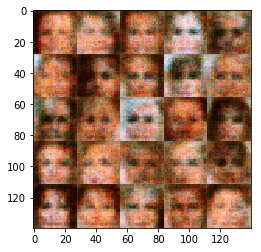

Iteration: 301
Iteration: 302
Iteration: 303
Iteration: 304
Iteration: 305
Iteration: 306
Iteration: 307
Iteration: 308
Iteration: 309
Iteration: 310
Epoch 0/1... Discriminator Loss: 0.8116... Generator Loss: 1.0428
Iteration: 311
Iteration: 312
Iteration: 313
Iteration: 314
Iteration: 315
Iteration: 316
Iteration: 317
Iteration: 318
Iteration: 319
Iteration: 320
Epoch 0/1... Discriminator Loss: 0.4057... Generator Loss: 2.1013
Iteration: 321
Iteration: 322
Iteration: 323
Iteration: 324
Iteration: 325
Iteration: 326
Iteration: 327
Iteration: 328
Iteration: 329
Iteration: 330
Epoch 0/1... Discriminator Loss: 1.2433... Generator Loss: 4.8747
Iteration: 331
Iteration: 332
Iteration: 333
Iteration: 334
Iteration: 335
Iteration: 336
Iteration: 337
Iteration: 338
Iteration: 339
Iteration: 340
Epoch 0/1... Discriminator Loss: 0.5056... Generator Loss: 1.3941
Iteration: 341
Iteration: 342
Iteration: 343
Iteration: 344
Iteration: 345
Iteration: 346
Iteration: 347
Iteration: 348
Iteration: 349
I

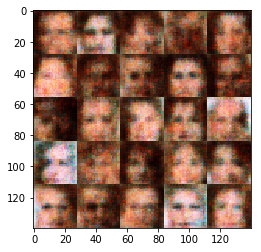

Iteration: 351
Iteration: 352
Iteration: 353
Iteration: 354
Iteration: 355
Iteration: 356
Iteration: 357
Iteration: 358
Iteration: 359
Iteration: 360
Epoch 0/1... Discriminator Loss: 0.7672... Generator Loss: 4.4796
Iteration: 361
Iteration: 362
Iteration: 363
Iteration: 364
Iteration: 365
Iteration: 366
Iteration: 367
Iteration: 368
Iteration: 369
Iteration: 370
Epoch 0/1... Discriminator Loss: 1.3783... Generator Loss: 0.3826
Iteration: 371
Iteration: 372
Iteration: 373
Iteration: 374
Iteration: 375
Iteration: 376
Iteration: 377
Iteration: 378
Iteration: 379
Iteration: 380
Epoch 0/1... Discriminator Loss: 2.3820... Generator Loss: 4.4741
Iteration: 381
Iteration: 382
Iteration: 383
Iteration: 384
Iteration: 385
Iteration: 386
Iteration: 387
Iteration: 388
Iteration: 389
Iteration: 390
Epoch 0/1... Discriminator Loss: 1.0343... Generator Loss: 0.6361
Iteration: 391
Iteration: 392
Iteration: 393
Iteration: 394
Iteration: 395
Iteration: 396
Iteration: 397
Iteration: 398
Iteration: 399
I

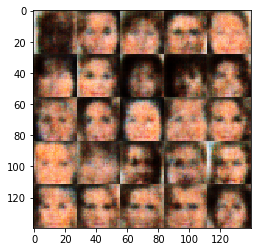

Iteration: 401
Iteration: 402
Iteration: 403
Iteration: 404
Iteration: 405
Iteration: 406
Iteration: 407
Iteration: 408
Iteration: 409
Iteration: 410
Epoch 0/1... Discriminator Loss: 0.6923... Generator Loss: 1.0173
Iteration: 411
Iteration: 412
Iteration: 413
Iteration: 414
Iteration: 415
Iteration: 416
Iteration: 417
Iteration: 418
Iteration: 419
Iteration: 420
Epoch 0/1... Discriminator Loss: 0.6835... Generator Loss: 2.6770
Iteration: 421
Iteration: 422
Iteration: 423
Iteration: 424
Iteration: 425
Iteration: 426
Iteration: 427
Iteration: 428
Iteration: 429
Iteration: 430
Epoch 0/1... Discriminator Loss: 1.3900... Generator Loss: 0.4124
Iteration: 431
Iteration: 432
Iteration: 433
Iteration: 434
Iteration: 435
Iteration: 436
Iteration: 437
Iteration: 438
Iteration: 439
Iteration: 440
Epoch 0/1... Discriminator Loss: 0.4927... Generator Loss: 1.6480
Iteration: 441
Iteration: 442
Iteration: 443
Iteration: 444
Iteration: 445
Iteration: 446
Iteration: 447
Iteration: 448
Iteration: 449
I

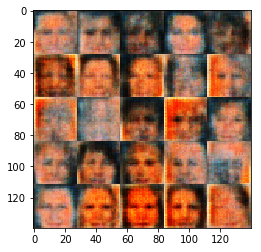

Iteration: 451
Iteration: 452
Iteration: 453
Iteration: 454
Iteration: 455
Iteration: 456
Iteration: 457
Iteration: 458
Iteration: 459
Iteration: 460
Epoch 0/1... Discriminator Loss: 0.8096... Generator Loss: 0.8029
Iteration: 461
Iteration: 462
Iteration: 463
Iteration: 464
Iteration: 465
Iteration: 466
Iteration: 467
Iteration: 468
Iteration: 469
Iteration: 470
Epoch 0/1... Discriminator Loss: 1.1477... Generator Loss: 3.9073
Iteration: 471
Iteration: 472
Iteration: 473
Iteration: 474
Iteration: 475
Iteration: 476
Iteration: 477
Iteration: 478
Iteration: 479
Iteration: 480
Epoch 0/1... Discriminator Loss: 0.6113... Generator Loss: 1.0107
Iteration: 481
Iteration: 482
Iteration: 483
Iteration: 484
Iteration: 485
Iteration: 486
Iteration: 487
Iteration: 488
Iteration: 489
Iteration: 490
Epoch 0/1... Discriminator Loss: 0.9152... Generator Loss: 0.9120
Iteration: 491
Iteration: 492
Iteration: 493
Iteration: 494
Iteration: 495
Iteration: 496
Iteration: 497
Iteration: 498
Iteration: 499
I

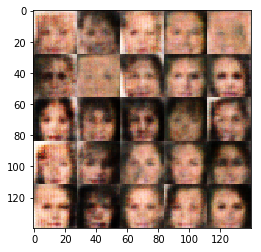

Iteration: 501
Iteration: 502
Iteration: 503
Iteration: 504
Iteration: 505
Iteration: 506
Iteration: 507
Iteration: 508
Iteration: 509
Iteration: 510
Epoch 0/1... Discriminator Loss: 0.8312... Generator Loss: 1.7554
Iteration: 511
Iteration: 512
Iteration: 513
Iteration: 514
Iteration: 515
Iteration: 516
Iteration: 517
Iteration: 518
Iteration: 519
Iteration: 520
Epoch 0/1... Discriminator Loss: 0.7286... Generator Loss: 0.9538
Iteration: 521
Iteration: 522
Iteration: 523
Iteration: 524
Iteration: 525
Iteration: 526
Iteration: 527
Iteration: 528
Iteration: 529
Iteration: 530
Epoch 0/1... Discriminator Loss: 0.9710... Generator Loss: 1.4807
Iteration: 531
Iteration: 532
Iteration: 533
Iteration: 534
Iteration: 535
Iteration: 536
Iteration: 537
Iteration: 538
Iteration: 539
Iteration: 540
Epoch 0/1... Discriminator Loss: 0.6286... Generator Loss: 1.6921
Iteration: 541
Iteration: 542
Iteration: 543
Iteration: 544
Iteration: 545
Iteration: 546
Iteration: 547
Iteration: 548
Iteration: 549
I

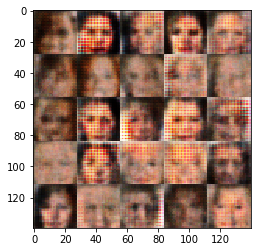

Iteration: 551
Iteration: 552
Iteration: 553
Iteration: 554
Iteration: 555
Iteration: 556
Iteration: 557
Iteration: 558
Iteration: 559
Iteration: 560
Epoch 0/1... Discriminator Loss: 0.5855... Generator Loss: 1.1746
Iteration: 561
Iteration: 562
Iteration: 563
Iteration: 564
Iteration: 565
Iteration: 566
Iteration: 567
Iteration: 568
Iteration: 569
Iteration: 570
Epoch 0/1... Discriminator Loss: 0.6219... Generator Loss: 1.2907
Iteration: 571
Iteration: 572
Iteration: 573
Iteration: 574
Iteration: 575
Iteration: 576
Iteration: 577
Iteration: 578
Iteration: 579
Iteration: 580
Epoch 0/1... Discriminator Loss: 0.4921... Generator Loss: 1.9409
Iteration: 581
Iteration: 582
Iteration: 583
Iteration: 584
Iteration: 585
Iteration: 586
Iteration: 587
Iteration: 588
Iteration: 589
Iteration: 590
Epoch 0/1... Discriminator Loss: 0.6601... Generator Loss: 1.7264
Iteration: 591
Iteration: 592
Iteration: 593
Iteration: 594
Iteration: 595
Iteration: 596
Iteration: 597
Iteration: 598
Iteration: 599
I

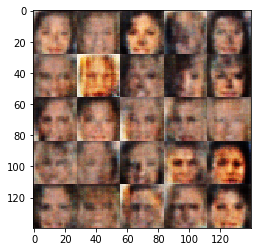

Iteration: 601
Iteration: 602
Iteration: 603
Iteration: 604
Iteration: 605
Iteration: 606
Iteration: 607
Iteration: 608
Iteration: 609
Iteration: 610
Epoch 0/1... Discriminator Loss: 0.8570... Generator Loss: 0.9323
Iteration: 611
Iteration: 612
Iteration: 613
Iteration: 614
Iteration: 615
Iteration: 616
Iteration: 617
Iteration: 618
Iteration: 619
Iteration: 620
Epoch 0/1... Discriminator Loss: 0.7430... Generator Loss: 1.3136
Iteration: 621
Iteration: 622
Iteration: 623
Iteration: 624
Iteration: 625
Iteration: 626
Iteration: 627
Iteration: 628
Iteration: 629
Iteration: 630
Epoch 0/1... Discriminator Loss: 0.5917... Generator Loss: 1.2013
Iteration: 631
Iteration: 632
Iteration: 633
Iteration: 634
Iteration: 635
Iteration: 636
Iteration: 637
Iteration: 638
Iteration: 639
Iteration: 640
Epoch 0/1... Discriminator Loss: 0.5736... Generator Loss: 1.8690
Iteration: 641
Iteration: 642
Iteration: 643
Iteration: 644
Iteration: 645
Iteration: 646
Iteration: 647
Iteration: 648
Iteration: 649
I

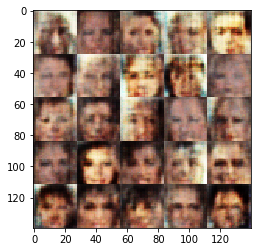

Iteration: 651
Iteration: 652
Iteration: 653
Iteration: 654
Iteration: 655
Iteration: 656
Iteration: 657
Iteration: 658
Iteration: 659
Iteration: 660
Epoch 0/1... Discriminator Loss: 0.6581... Generator Loss: 1.4729
Iteration: 661
Iteration: 662
Iteration: 663
Iteration: 664
Iteration: 665
Iteration: 666
Iteration: 667
Iteration: 668
Iteration: 669
Iteration: 670
Epoch 0/1... Discriminator Loss: 0.7287... Generator Loss: 1.2856
Iteration: 671
Iteration: 672
Iteration: 673
Iteration: 674
Iteration: 675
Iteration: 676
Iteration: 677
Iteration: 678
Iteration: 679
Iteration: 680
Epoch 0/1... Discriminator Loss: 1.0708... Generator Loss: 0.7472
Iteration: 681
Iteration: 682
Iteration: 683
Iteration: 684
Iteration: 685
Iteration: 686
Iteration: 687
Iteration: 688
Iteration: 689
Iteration: 690
Epoch 0/1... Discriminator Loss: 0.8914... Generator Loss: 1.6187
Iteration: 691
Iteration: 692
Iteration: 693
Iteration: 694
Iteration: 695
Iteration: 696
Iteration: 697
Iteration: 698
Iteration: 699
I

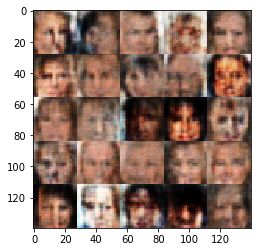

Iteration: 701
Iteration: 702
Iteration: 703
Iteration: 704
Iteration: 705
Iteration: 706
Iteration: 707
Iteration: 708
Iteration: 709
Iteration: 710
Epoch 0/1... Discriminator Loss: 0.6550... Generator Loss: 1.1716
Iteration: 711
Iteration: 712
Iteration: 713
Iteration: 714
Iteration: 715
Iteration: 716
Iteration: 717
Iteration: 718
Iteration: 719
Iteration: 720
Epoch 0/1... Discriminator Loss: 0.7554... Generator Loss: 1.1844
Iteration: 721
Iteration: 722
Iteration: 723
Iteration: 724
Iteration: 725
Iteration: 726
Iteration: 727
Iteration: 728
Iteration: 729
Iteration: 730
Epoch 0/1... Discriminator Loss: 0.8896... Generator Loss: 1.4679
Iteration: 731
Iteration: 732
Iteration: 733
Iteration: 734
Iteration: 735
Iteration: 736
Iteration: 737
Iteration: 738
Iteration: 739
Iteration: 740
Epoch 0/1... Discriminator Loss: 0.9568... Generator Loss: 1.6054
Iteration: 741
Iteration: 742
Iteration: 743
Iteration: 744
Iteration: 745
Iteration: 746
Iteration: 747
Iteration: 748
Iteration: 749
I

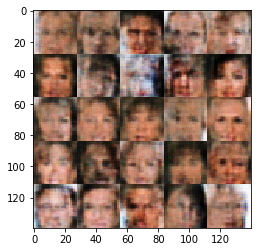

Iteration: 751
Iteration: 752
Iteration: 753
Iteration: 754
Iteration: 755
Iteration: 756
Iteration: 757
Iteration: 758
Iteration: 759
Iteration: 760
Epoch 0/1... Discriminator Loss: 0.8927... Generator Loss: 0.9775
Iteration: 761
Iteration: 762
Iteration: 763
Iteration: 764
Iteration: 765
Iteration: 766
Iteration: 767
Iteration: 768
Iteration: 769
Iteration: 770
Epoch 0/1... Discriminator Loss: 0.7578... Generator Loss: 1.3916
Iteration: 771
Iteration: 772
Iteration: 773
Iteration: 774
Iteration: 775
Iteration: 776
Iteration: 777
Iteration: 778
Iteration: 779
Iteration: 780
Epoch 0/1... Discriminator Loss: 0.9103... Generator Loss: 1.0192
Iteration: 781
Iteration: 782
Iteration: 783
Iteration: 784
Iteration: 785
Iteration: 786
Iteration: 787
Iteration: 788
Iteration: 789
Iteration: 790
Epoch 0/1... Discriminator Loss: 0.8671... Generator Loss: 1.4785
Iteration: 791
Iteration: 792
Iteration: 793
Iteration: 794
Iteration: 795
Iteration: 796
Iteration: 797
Iteration: 798
Iteration: 799
I

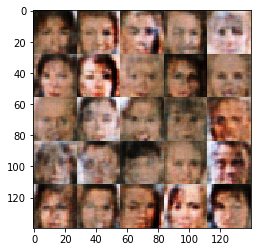

Iteration: 801
Iteration: 802
Iteration: 803
Iteration: 804
Iteration: 805
Iteration: 806
Iteration: 807
Iteration: 808
Iteration: 809
Iteration: 810
Epoch 0/1... Discriminator Loss: 0.7890... Generator Loss: 1.5627
Iteration: 811
Iteration: 812
Iteration: 813
Iteration: 814
Iteration: 815
Iteration: 816
Iteration: 817
Iteration: 818
Iteration: 819
Iteration: 820
Epoch 0/1... Discriminator Loss: 0.9257... Generator Loss: 0.7261
Iteration: 821
Iteration: 822
Iteration: 823
Iteration: 824
Iteration: 825
Iteration: 826
Iteration: 827
Iteration: 828
Iteration: 829
Iteration: 830
Epoch 0/1... Discriminator Loss: 0.8883... Generator Loss: 0.8172
Iteration: 831
Iteration: 832
Iteration: 833
Iteration: 834
Iteration: 835
Iteration: 836
Iteration: 837
Iteration: 838
Iteration: 839
Iteration: 840
Epoch 0/1... Discriminator Loss: 1.0907... Generator Loss: 0.7924
Iteration: 841
Iteration: 842
Iteration: 843
Iteration: 844
Iteration: 845
Iteration: 846
Iteration: 847
Iteration: 848
Iteration: 849
I

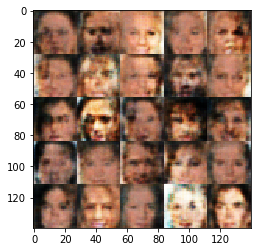

Iteration: 851
Iteration: 852
Iteration: 853
Iteration: 854
Iteration: 855
Iteration: 856
Iteration: 857
Iteration: 858
Iteration: 859
Iteration: 860
Epoch 0/1... Discriminator Loss: 1.0073... Generator Loss: 1.4998
Iteration: 861
Iteration: 862
Iteration: 863
Iteration: 864
Iteration: 865
Iteration: 866
Iteration: 867
Iteration: 868
Iteration: 869
Iteration: 870
Epoch 0/1... Discriminator Loss: 0.9663... Generator Loss: 0.8297
Iteration: 871
Iteration: 872
Iteration: 873
Iteration: 874
Iteration: 875
Iteration: 876
Iteration: 877
Iteration: 878
Iteration: 879
Iteration: 880
Epoch 0/1... Discriminator Loss: 1.0756... Generator Loss: 0.9956
Iteration: 881
Iteration: 882
Iteration: 883
Iteration: 884
Iteration: 885
Iteration: 886
Iteration: 887
Iteration: 888
Iteration: 889
Iteration: 890
Epoch 0/1... Discriminator Loss: 0.9791... Generator Loss: 1.2410
Iteration: 891
Iteration: 892
Iteration: 893
Iteration: 894
Iteration: 895
Iteration: 896
Iteration: 897
Iteration: 898
Iteration: 899
I

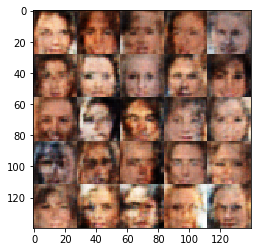

Iteration: 901
Iteration: 902
Iteration: 903
Iteration: 904
Iteration: 905
Iteration: 906
Iteration: 907
Iteration: 908
Iteration: 909
Iteration: 910
Epoch 0/1... Discriminator Loss: 1.0015... Generator Loss: 1.3701
Iteration: 911
Iteration: 912
Iteration: 913
Iteration: 914
Iteration: 915
Iteration: 916
Iteration: 917
Iteration: 918
Iteration: 919
Iteration: 920
Epoch 0/1... Discriminator Loss: 1.2376... Generator Loss: 0.7516
Iteration: 921
Iteration: 922
Iteration: 923
Iteration: 924
Iteration: 925
Iteration: 926
Iteration: 927
Iteration: 928
Iteration: 929
Iteration: 930
Epoch 0/1... Discriminator Loss: 1.0243... Generator Loss: 0.8574
Iteration: 931
Iteration: 932
Iteration: 933
Iteration: 934
Iteration: 935
Iteration: 936
Iteration: 937
Iteration: 938
Iteration: 939
Iteration: 940
Epoch 0/1... Discriminator Loss: 1.1210... Generator Loss: 0.5789
Iteration: 941
Iteration: 942
Iteration: 943
Iteration: 944
Iteration: 945
Iteration: 946
Iteration: 947
Iteration: 948
Iteration: 949
I

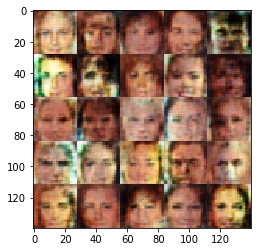

Iteration: 951
Iteration: 952
Iteration: 953
Iteration: 954
Iteration: 955
Iteration: 956
Iteration: 957
Iteration: 958
Iteration: 959
Iteration: 960
Epoch 0/1... Discriminator Loss: 0.9866... Generator Loss: 1.0119
Iteration: 961
Iteration: 962
Iteration: 963
Iteration: 964
Iteration: 965
Iteration: 966
Iteration: 967
Iteration: 968
Iteration: 969
Iteration: 970
Epoch 0/1... Discriminator Loss: 1.2092... Generator Loss: 0.7476
Iteration: 971
Iteration: 972
Iteration: 973
Iteration: 974
Iteration: 975
Iteration: 976
Iteration: 977
Iteration: 978
Iteration: 979
Iteration: 980
Epoch 0/1... Discriminator Loss: 1.3021... Generator Loss: 0.5303
Iteration: 981
Iteration: 982
Iteration: 983
Iteration: 984
Iteration: 985
Iteration: 986
Iteration: 987
Iteration: 988
Iteration: 989
Iteration: 990
Epoch 0/1... Discriminator Loss: 1.1439... Generator Loss: 0.5913
Iteration: 991
Iteration: 992
Iteration: 993
Iteration: 994
Iteration: 995
Iteration: 996
Iteration: 997
Iteration: 998
Iteration: 999
I

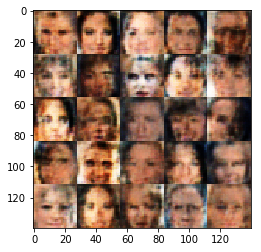

Iteration: 1001
Iteration: 1002
Iteration: 1003
Iteration: 1004
Iteration: 1005
Iteration: 1006
Iteration: 1007
Iteration: 1008
Iteration: 1009
Iteration: 1010
Epoch 0/1... Discriminator Loss: 0.9823... Generator Loss: 1.0669
Iteration: 1011
Iteration: 1012
Iteration: 1013
Iteration: 1014
Iteration: 1015
Iteration: 1016
Iteration: 1017
Iteration: 1018
Iteration: 1019
Iteration: 1020
Epoch 0/1... Discriminator Loss: 1.3007... Generator Loss: 0.6228
Iteration: 1021
Iteration: 1022
Iteration: 1023
Iteration: 1024
Iteration: 1025
Iteration: 1026
Iteration: 1027
Iteration: 1028
Iteration: 1029
Iteration: 1030
Epoch 0/1... Discriminator Loss: 0.8991... Generator Loss: 1.4681
Iteration: 1031
Iteration: 1032
Iteration: 1033
Iteration: 1034
Iteration: 1035
Iteration: 1036
Iteration: 1037
Iteration: 1038
Iteration: 1039
Iteration: 1040
Epoch 0/1... Discriminator Loss: 0.9480... Generator Loss: 1.0684
Iteration: 1041
Iteration: 1042
Iteration: 1043
Iteration: 1044
Iteration: 1045
Iteration: 1046


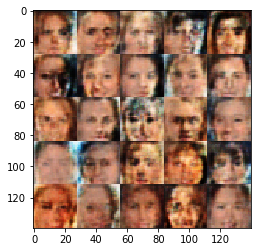

Iteration: 1051
Iteration: 1052
Iteration: 1053
Iteration: 1054
Iteration: 1055
Iteration: 1056
Iteration: 1057
Iteration: 1058
Iteration: 1059
Iteration: 1060
Epoch 0/1... Discriminator Loss: 1.1060... Generator Loss: 0.6361
Iteration: 1061
Iteration: 1062
Iteration: 1063
Iteration: 1064
Iteration: 1065
Iteration: 1066
Iteration: 1067
Iteration: 1068
Iteration: 1069
Iteration: 1070
Epoch 0/1... Discriminator Loss: 1.0086... Generator Loss: 0.7525
Iteration: 1071
Iteration: 1072
Iteration: 1073
Iteration: 1074
Iteration: 1075
Iteration: 1076
Iteration: 1077
Iteration: 1078
Iteration: 1079
Iteration: 1080
Epoch 0/1... Discriminator Loss: 1.0116... Generator Loss: 0.9555
Iteration: 1081
Iteration: 1082
Iteration: 1083
Iteration: 1084
Iteration: 1085
Iteration: 1086
Iteration: 1087
Iteration: 1088
Iteration: 1089
Iteration: 1090
Epoch 0/1... Discriminator Loss: 1.0807... Generator Loss: 0.6422
Iteration: 1091
Iteration: 1092
Iteration: 1093
Iteration: 1094
Iteration: 1095
Iteration: 1096


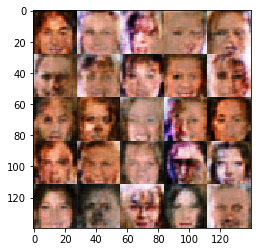

Iteration: 1101
Iteration: 1102
Iteration: 1103
Iteration: 1104
Iteration: 1105
Iteration: 1106
Iteration: 1107
Iteration: 1108
Iteration: 1109
Iteration: 1110
Epoch 0/1... Discriminator Loss: 1.1108... Generator Loss: 0.7222
Iteration: 1111
Iteration: 1112
Iteration: 1113
Iteration: 1114
Iteration: 1115
Iteration: 1116
Iteration: 1117
Iteration: 1118
Iteration: 1119
Iteration: 1120
Epoch 0/1... Discriminator Loss: 0.9415... Generator Loss: 0.9956
Iteration: 1121
Iteration: 1122
Iteration: 1123
Iteration: 1124
Iteration: 1125
Iteration: 1126
Iteration: 1127
Iteration: 1128
Iteration: 1129
Iteration: 1130
Epoch 0/1... Discriminator Loss: 0.9031... Generator Loss: 1.2439
Iteration: 1131
Iteration: 1132
Iteration: 1133
Iteration: 1134
Iteration: 1135
Iteration: 1136
Iteration: 1137
Iteration: 1138
Iteration: 1139
Iteration: 1140
Epoch 0/1... Discriminator Loss: 1.0221... Generator Loss: 0.9614
Iteration: 1141
Iteration: 1142
Iteration: 1143
Iteration: 1144
Iteration: 1145
Iteration: 1146


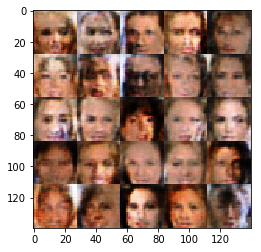

Iteration: 1151
Iteration: 1152
Iteration: 1153
Iteration: 1154
Iteration: 1155
Iteration: 1156
Iteration: 1157
Iteration: 1158
Iteration: 1159
Iteration: 1160
Epoch 0/1... Discriminator Loss: 1.0362... Generator Loss: 1.4288
Iteration: 1161
Iteration: 1162
Iteration: 1163
Iteration: 1164
Iteration: 1165
Iteration: 1166
Iteration: 1167
Iteration: 1168
Iteration: 1169
Iteration: 1170
Epoch 0/1... Discriminator Loss: 1.0071... Generator Loss: 0.7890
Iteration: 1171
Iteration: 1172
Iteration: 1173
Iteration: 1174
Iteration: 1175
Iteration: 1176
Iteration: 1177
Iteration: 1178
Iteration: 1179
Iteration: 1180
Epoch 0/1... Discriminator Loss: 0.9067... Generator Loss: 0.8232
Iteration: 1181
Iteration: 1182
Iteration: 1183
Iteration: 1184
Iteration: 1185
Iteration: 1186
Iteration: 1187
Iteration: 1188
Iteration: 1189
Iteration: 1190
Epoch 0/1... Discriminator Loss: 1.0832... Generator Loss: 0.6866
Iteration: 1191
Iteration: 1192
Iteration: 1193
Iteration: 1194
Iteration: 1195
Iteration: 1196


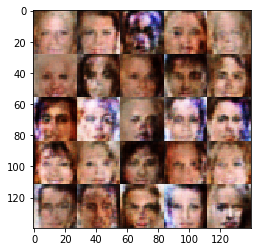

Iteration: 1201
Iteration: 1202
Iteration: 1203
Iteration: 1204
Iteration: 1205
Iteration: 1206
Iteration: 1207
Iteration: 1208
Iteration: 1209
Iteration: 1210
Epoch 0/1... Discriminator Loss: 1.0945... Generator Loss: 1.0708
Iteration: 1211
Iteration: 1212
Iteration: 1213
Iteration: 1214
Iteration: 1215
Iteration: 1216
Iteration: 1217
Iteration: 1218
Iteration: 1219
Iteration: 1220
Epoch 0/1... Discriminator Loss: 0.9448... Generator Loss: 0.8083
Iteration: 1221
Iteration: 1222
Iteration: 1223
Iteration: 1224
Iteration: 1225
Iteration: 1226
Iteration: 1227
Iteration: 1228
Iteration: 1229
Iteration: 1230
Epoch 0/1... Discriminator Loss: 0.9511... Generator Loss: 1.1045
Iteration: 1231
Iteration: 1232
Iteration: 1233
Iteration: 1234
Iteration: 1235
Iteration: 1236
Iteration: 1237
Iteration: 1238
Iteration: 1239
Iteration: 1240
Epoch 0/1... Discriminator Loss: 1.0194... Generator Loss: 0.9635
Iteration: 1241
Iteration: 1242
Iteration: 1243
Iteration: 1244
Iteration: 1245
Iteration: 1246


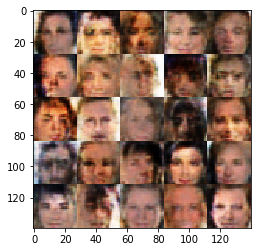

Iteration: 1251
Iteration: 1252
Iteration: 1253
Iteration: 1254
Iteration: 1255
Iteration: 1256
Iteration: 1257
Iteration: 1258
Iteration: 1259
Iteration: 1260
Epoch 0/1... Discriminator Loss: 0.8361... Generator Loss: 1.3003
Iteration: 1261
Iteration: 1262
Iteration: 1263
Iteration: 1264
Iteration: 1265
Iteration: 1266
Iteration: 1267
Iteration: 1268
Iteration: 1269
Iteration: 1270
Epoch 0/1... Discriminator Loss: 0.8151... Generator Loss: 1.1447
Iteration: 1271
Iteration: 1272
Iteration: 1273
Iteration: 1274
Iteration: 1275
Iteration: 1276
Iteration: 1277
Iteration: 1278
Iteration: 1279
Iteration: 1280
Epoch 0/1... Discriminator Loss: 1.1394... Generator Loss: 0.8335
Iteration: 1281
Iteration: 1282
Iteration: 1283
Iteration: 1284
Iteration: 1285
Iteration: 1286
Iteration: 1287
Iteration: 1288
Iteration: 1289
Iteration: 1290
Epoch 0/1... Discriminator Loss: 0.9134... Generator Loss: 0.8796
Iteration: 1291
Iteration: 1292
Iteration: 1293
Iteration: 1294
Iteration: 1295
Iteration: 1296


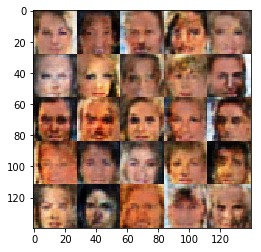

Iteration: 1301
Iteration: 1302
Iteration: 1303
Iteration: 1304
Iteration: 1305
Iteration: 1306
Iteration: 1307
Iteration: 1308
Iteration: 1309
Iteration: 1310
Epoch 0/1... Discriminator Loss: 1.0351... Generator Loss: 0.8040
Iteration: 1311
Iteration: 1312
Iteration: 1313
Iteration: 1314
Iteration: 1315
Iteration: 1316
Iteration: 1317
Iteration: 1318
Iteration: 1319
Iteration: 1320
Epoch 0/1... Discriminator Loss: 0.8975... Generator Loss: 1.0170
Iteration: 1321
Iteration: 1322
Iteration: 1323
Iteration: 1324
Iteration: 1325
Iteration: 1326
Iteration: 1327
Iteration: 1328
Iteration: 1329
Iteration: 1330
Epoch 0/1... Discriminator Loss: 0.8809... Generator Loss: 1.5829
Iteration: 1331
Iteration: 1332
Iteration: 1333
Iteration: 1334
Iteration: 1335
Iteration: 1336
Iteration: 1337
Iteration: 1338
Iteration: 1339
Iteration: 1340
Epoch 0/1... Discriminator Loss: 1.0308... Generator Loss: 0.6749
Iteration: 1341
Iteration: 1342
Iteration: 1343
Iteration: 1344
Iteration: 1345
Iteration: 1346


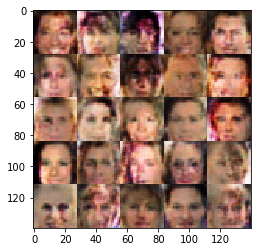

Iteration: 1351
Iteration: 1352
Iteration: 1353
Iteration: 1354
Iteration: 1355
Iteration: 1356
Iteration: 1357
Iteration: 1358
Iteration: 1359
Iteration: 1360
Epoch 0/1... Discriminator Loss: 0.7981... Generator Loss: 1.0146
Iteration: 1361
Iteration: 1362
Iteration: 1363
Iteration: 1364
Iteration: 1365
Iteration: 1366
Iteration: 1367
Iteration: 1368
Iteration: 1369
Iteration: 1370
Epoch 0/1... Discriminator Loss: 0.8574... Generator Loss: 1.3058
Iteration: 1371
Iteration: 1372
Iteration: 1373
Iteration: 1374
Iteration: 1375
Iteration: 1376
Iteration: 1377
Iteration: 1378
Iteration: 1379
Iteration: 1380
Epoch 0/1... Discriminator Loss: 0.9776... Generator Loss: 0.8371
Iteration: 1381
Iteration: 1382
Iteration: 1383
Iteration: 1384
Iteration: 1385
Iteration: 1386
Iteration: 1387
Iteration: 1388
Iteration: 1389
Iteration: 1390
Epoch 0/1... Discriminator Loss: 0.9276... Generator Loss: 0.9486
Iteration: 1391
Iteration: 1392
Iteration: 1393
Iteration: 1394
Iteration: 1395
Iteration: 1396


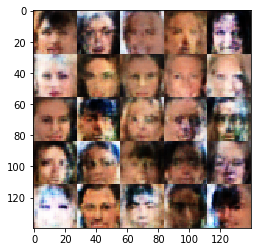

Iteration: 1401
Iteration: 1402
Iteration: 1403
Iteration: 1404
Iteration: 1405
Iteration: 1406
Iteration: 1407
Iteration: 1408
Iteration: 1409
Iteration: 1410
Epoch 0/1... Discriminator Loss: 0.8538... Generator Loss: 0.9297
Iteration: 1411
Iteration: 1412
Iteration: 1413
Iteration: 1414
Iteration: 1415
Iteration: 1416
Iteration: 1417
Iteration: 1418
Iteration: 1419
Iteration: 1420
Epoch 0/1... Discriminator Loss: 1.0828... Generator Loss: 0.6313
Iteration: 1421
Iteration: 1422
Iteration: 1423
Iteration: 1424
Iteration: 1425
Iteration: 1426
Iteration: 1427
Iteration: 1428
Iteration: 1429
Iteration: 1430
Epoch 0/1... Discriminator Loss: 0.8695... Generator Loss: 0.9745
Iteration: 1431
Iteration: 1432
Iteration: 1433
Iteration: 1434
Iteration: 1435
Iteration: 1436
Iteration: 1437
Iteration: 1438
Iteration: 1439
Iteration: 1440
Epoch 0/1... Discriminator Loss: 0.8012... Generator Loss: 1.1506
Iteration: 1441
Iteration: 1442
Iteration: 1443
Iteration: 1444
Iteration: 1445
Iteration: 1446


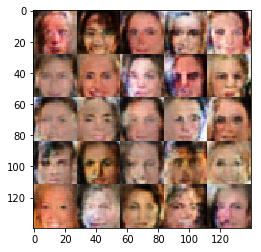

Iteration: 1451
Iteration: 1452
Iteration: 1453
Iteration: 1454
Iteration: 1455
Iteration: 1456
Iteration: 1457
Iteration: 1458
Iteration: 1459
Iteration: 1460
Epoch 0/1... Discriminator Loss: 0.9008... Generator Loss: 0.8640
Iteration: 1461
Iteration: 1462
Iteration: 1463
Iteration: 1464
Iteration: 1465
Iteration: 1466
Iteration: 1467
Iteration: 1468
Iteration: 1469
Iteration: 1470
Epoch 0/1... Discriminator Loss: 1.3677... Generator Loss: 0.4781
Iteration: 1471
Iteration: 1472
Iteration: 1473
Iteration: 1474
Iteration: 1475
Iteration: 1476
Iteration: 1477
Iteration: 1478
Iteration: 1479
Iteration: 1480
Epoch 0/1... Discriminator Loss: 0.6099... Generator Loss: 1.3739
Iteration: 1481
Iteration: 1482
Iteration: 1483
Iteration: 1484
Iteration: 1485
Iteration: 1486
Iteration: 1487
Iteration: 1488
Iteration: 1489
Iteration: 1490
Epoch 0/1... Discriminator Loss: 1.2209... Generator Loss: 0.7182
Iteration: 1491
Iteration: 1492
Iteration: 1493
Iteration: 1494
Iteration: 1495
Iteration: 1496


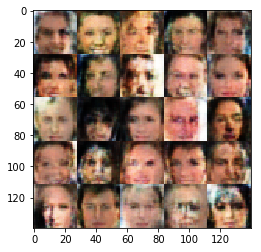

Iteration: 1501
Iteration: 1502
Iteration: 1503
Iteration: 1504
Iteration: 1505
Iteration: 1506
Iteration: 1507
Iteration: 1508
Iteration: 1509
Iteration: 1510
Epoch 0/1... Discriminator Loss: 1.1015... Generator Loss: 0.6293
Iteration: 1511
Iteration: 1512
Iteration: 1513
Iteration: 1514
Iteration: 1515
Iteration: 1516
Iteration: 1517
Iteration: 1518
Iteration: 1519
Iteration: 1520
Epoch 0/1... Discriminator Loss: 1.0458... Generator Loss: 0.8994
Iteration: 1521
Iteration: 1522
Iteration: 1523
Iteration: 1524
Iteration: 1525
Iteration: 1526
Iteration: 1527
Iteration: 1528
Iteration: 1529
Iteration: 1530
Epoch 0/1... Discriminator Loss: 1.1512... Generator Loss: 0.6191
Iteration: 1531
Iteration: 1532
Iteration: 1533
Iteration: 1534
Iteration: 1535
Iteration: 1536
Iteration: 1537
Iteration: 1538
Iteration: 1539
Iteration: 1540
Epoch 0/1... Discriminator Loss: 0.6570... Generator Loss: 1.1365
Iteration: 1541
Iteration: 1542
Iteration: 1543
Iteration: 1544
Iteration: 1545
Iteration: 1546


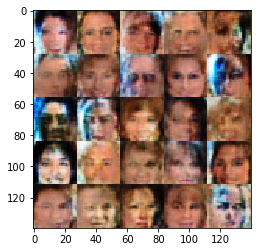

Iteration: 1551
Iteration: 1552
Iteration: 1553
Iteration: 1554
Iteration: 1555
Iteration: 1556
Iteration: 1557
Iteration: 1558
Iteration: 1559
Iteration: 1560
Epoch 0/1... Discriminator Loss: 0.8856... Generator Loss: 0.9390
Iteration: 1561
Iteration: 1562
Iteration: 1563
Iteration: 1564
Iteration: 1565
Iteration: 1566
Iteration: 1567
Iteration: 1568
Iteration: 1569
Iteration: 1570
Epoch 0/1... Discriminator Loss: 0.7075... Generator Loss: 1.1814
Iteration: 1571
Iteration: 1572
Iteration: 1573
Iteration: 1574
Iteration: 1575
Iteration: 1576
Iteration: 1577
Iteration: 1578
Iteration: 1579
Iteration: 1580
Epoch 0/1... Discriminator Loss: 1.0578... Generator Loss: 0.8442
Iteration: 1581
Iteration: 1582
Iteration: 1583
Iteration: 1584
Iteration: 1585
Iteration: 1586
Iteration: 1587
Iteration: 1588
Iteration: 1589
Iteration: 1590
Epoch 0/1... Discriminator Loss: 1.0488... Generator Loss: 0.8351
Iteration: 1591
Iteration: 1592
Iteration: 1593
Iteration: 1594
Iteration: 1595
Iteration: 1596


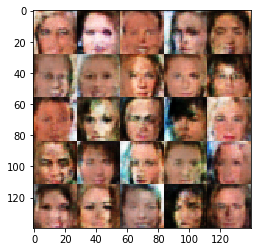

Iteration: 1601
Iteration: 1602
Iteration: 1603
Iteration: 1604
Iteration: 1605
Iteration: 1606
Iteration: 1607
Iteration: 1608
Iteration: 1609
Iteration: 1610
Epoch 0/1... Discriminator Loss: 1.6110... Generator Loss: 0.2908
Iteration: 1611
Iteration: 1612
Iteration: 1613
Iteration: 1614
Iteration: 1615
Iteration: 1616
Iteration: 1617
Iteration: 1618
Iteration: 1619
Iteration: 1620
Epoch 0/1... Discriminator Loss: 0.8075... Generator Loss: 0.9451
Iteration: 1621
Iteration: 1622
Iteration: 1623
Iteration: 1624
Iteration: 1625
Iteration: 1626
Iteration: 1627
Iteration: 1628
Iteration: 1629
Iteration: 1630
Epoch 0/1... Discriminator Loss: 0.9239... Generator Loss: 0.8346
Iteration: 1631
Iteration: 1632
Iteration: 1633
Iteration: 1634
Iteration: 1635
Iteration: 1636
Iteration: 1637
Iteration: 1638
Iteration: 1639
Iteration: 1640
Epoch 0/1... Discriminator Loss: 1.1442... Generator Loss: 0.6280
Iteration: 1641
Iteration: 1642
Iteration: 1643
Iteration: 1644
Iteration: 1645
Iteration: 1646


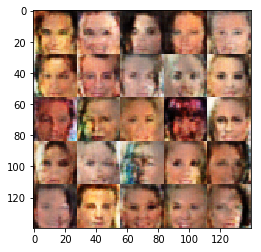

Iteration: 1651
Iteration: 1652
Iteration: 1653
Iteration: 1654
Iteration: 1655
Iteration: 1656
Iteration: 1657
Iteration: 1658
Iteration: 1659
Iteration: 1660
Epoch 0/1... Discriminator Loss: 0.8698... Generator Loss: 0.8022
Iteration: 1661
Iteration: 1662
Iteration: 1663
Iteration: 1664
Iteration: 1665
Iteration: 1666
Iteration: 1667
Iteration: 1668
Iteration: 1669
Iteration: 1670
Epoch 0/1... Discriminator Loss: 0.9519... Generator Loss: 1.0616
Iteration: 1671
Iteration: 1672
Iteration: 1673
Iteration: 1674
Iteration: 1675
Iteration: 1676
Iteration: 1677
Iteration: 1678
Iteration: 1679
Iteration: 1680
Epoch 0/1... Discriminator Loss: 0.9370... Generator Loss: 0.9597
Iteration: 1681
Iteration: 1682
Iteration: 1683
Iteration: 1684
Iteration: 1685
Iteration: 1686
Iteration: 1687
Iteration: 1688
Iteration: 1689
Iteration: 1690
Epoch 0/1... Discriminator Loss: 0.7221... Generator Loss: 1.0766
Iteration: 1691
Iteration: 1692
Iteration: 1693
Iteration: 1694
Iteration: 1695
Iteration: 1696


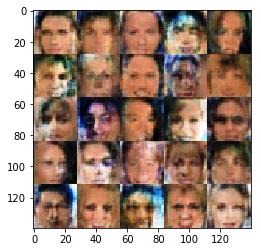

Iteration: 1701
Iteration: 1702
Iteration: 1703
Iteration: 1704
Iteration: 1705
Iteration: 1706
Iteration: 1707
Iteration: 1708
Iteration: 1709
Iteration: 1710
Epoch 0/1... Discriminator Loss: 1.1972... Generator Loss: 0.8073
Iteration: 1711
Iteration: 1712
Iteration: 1713
Iteration: 1714
Iteration: 1715
Iteration: 1716
Iteration: 1717
Iteration: 1718
Iteration: 1719
Iteration: 1720
Epoch 0/1... Discriminator Loss: 1.1224... Generator Loss: 0.8512
Iteration: 1721
Iteration: 1722
Iteration: 1723
Iteration: 1724
Iteration: 1725
Iteration: 1726
Iteration: 1727
Iteration: 1728
Iteration: 1729
Iteration: 1730
Epoch 0/1... Discriminator Loss: 0.7739... Generator Loss: 1.0382
Iteration: 1731
Iteration: 1732
Iteration: 1733
Iteration: 1734
Iteration: 1735
Iteration: 1736
Iteration: 1737
Iteration: 1738
Iteration: 1739
Iteration: 1740
Epoch 0/1... Discriminator Loss: 0.8944... Generator Loss: 1.1645
Iteration: 1741
Iteration: 1742
Iteration: 1743
Iteration: 1744
Iteration: 1745
Iteration: 1746


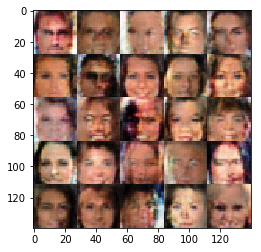

Iteration: 1751
Iteration: 1752
Iteration: 1753
Iteration: 1754
Iteration: 1755
Iteration: 1756
Iteration: 1757
Iteration: 1758
Iteration: 1759
Iteration: 1760
Epoch 0/1... Discriminator Loss: 0.8305... Generator Loss: 0.8595
Iteration: 1761
Iteration: 1762
Iteration: 1763
Iteration: 1764
Iteration: 1765
Iteration: 1766
Iteration: 1767
Iteration: 1768
Iteration: 1769
Iteration: 1770
Epoch 0/1... Discriminator Loss: 1.1553... Generator Loss: 0.6436
Iteration: 1771
Iteration: 1772
Iteration: 1773
Iteration: 1774
Iteration: 1775
Iteration: 1776
Iteration: 1777
Iteration: 1778
Iteration: 1779
Iteration: 1780
Epoch 0/1... Discriminator Loss: 1.0734... Generator Loss: 0.7332
Iteration: 1781
Iteration: 1782
Iteration: 1783
Iteration: 1784
Iteration: 1785
Iteration: 1786
Iteration: 1787
Iteration: 1788
Iteration: 1789
Iteration: 1790
Epoch 0/1... Discriminator Loss: 0.9285... Generator Loss: 0.8080
Iteration: 1791
Iteration: 1792
Iteration: 1793
Iteration: 1794
Iteration: 1795
Iteration: 1796


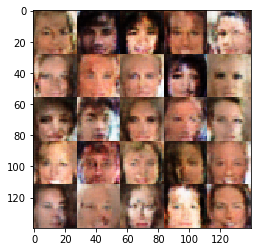

Iteration: 1801
Iteration: 1802
Iteration: 1803
Iteration: 1804
Iteration: 1805
Iteration: 1806
Iteration: 1807
Iteration: 1808
Iteration: 1809
Iteration: 1810
Epoch 0/1... Discriminator Loss: 0.7437... Generator Loss: 1.0680
Iteration: 1811
Iteration: 1812
Iteration: 1813
Iteration: 1814
Iteration: 1815
Iteration: 1816
Iteration: 1817
Iteration: 1818
Iteration: 1819
Iteration: 1820
Epoch 0/1... Discriminator Loss: 0.7907... Generator Loss: 1.1925
Iteration: 1821
Iteration: 1822
Iteration: 1823
Iteration: 1824
Iteration: 1825
Iteration: 1826
Iteration: 1827
Iteration: 1828
Iteration: 1829
Iteration: 1830
Epoch 0/1... Discriminator Loss: 1.0182... Generator Loss: 0.7895
Iteration: 1831
Iteration: 1832
Iteration: 1833
Iteration: 1834
Iteration: 1835
Iteration: 1836
Iteration: 1837
Iteration: 1838
Iteration: 1839
Iteration: 1840
Epoch 0/1... Discriminator Loss: 1.0932... Generator Loss: 0.5855
Iteration: 1841
Iteration: 1842
Iteration: 1843
Iteration: 1844
Iteration: 1845
Iteration: 1846


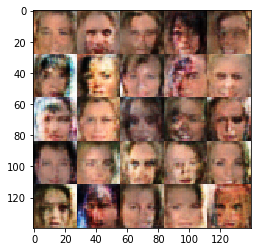

Iteration: 1851
Iteration: 1852
Iteration: 1853
Iteration: 1854
Iteration: 1855
Iteration: 1856
Iteration: 1857
Iteration: 1858
Iteration: 1859
Iteration: 1860
Epoch 0/1... Discriminator Loss: 1.1228... Generator Loss: 0.7792
Iteration: 1861
Iteration: 1862
Iteration: 1863
Iteration: 1864
Iteration: 1865
Iteration: 1866
Iteration: 1867
Iteration: 1868
Iteration: 1869
Iteration: 1870
Epoch 0/1... Discriminator Loss: 0.8674... Generator Loss: 1.1010
Iteration: 1871
Iteration: 1872
Iteration: 1873
Iteration: 1874
Iteration: 1875
Iteration: 1876
Iteration: 1877
Iteration: 1878
Iteration: 1879
Iteration: 1880
Epoch 0/1... Discriminator Loss: 0.8918... Generator Loss: 0.9582
Iteration: 1881
Iteration: 1882
Iteration: 1883
Iteration: 1884
Iteration: 1885
Iteration: 1886
Iteration: 1887
Iteration: 1888
Iteration: 1889
Iteration: 1890
Epoch 0/1... Discriminator Loss: 0.9905... Generator Loss: 0.7556
Iteration: 1891
Iteration: 1892
Iteration: 1893
Iteration: 1894
Iteration: 1895
Iteration: 1896


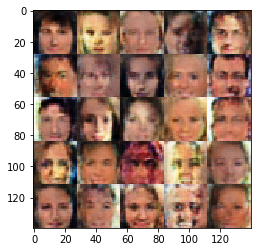

Iteration: 1901
Iteration: 1902
Iteration: 1903
Iteration: 1904
Iteration: 1905
Iteration: 1906
Iteration: 1907
Iteration: 1908
Iteration: 1909
Iteration: 1910
Epoch 0/1... Discriminator Loss: 1.0169... Generator Loss: 0.8521
Iteration: 1911
Iteration: 1912
Iteration: 1913
Iteration: 1914
Iteration: 1915
Iteration: 1916
Iteration: 1917
Iteration: 1918
Iteration: 1919
Iteration: 1920
Epoch 0/1... Discriminator Loss: 1.1034... Generator Loss: 0.7507
Iteration: 1921
Iteration: 1922
Iteration: 1923
Iteration: 1924
Iteration: 1925
Iteration: 1926
Iteration: 1927
Iteration: 1928
Iteration: 1929
Iteration: 1930
Epoch 0/1... Discriminator Loss: 1.1788... Generator Loss: 0.6216
Iteration: 1931
Iteration: 1932
Iteration: 1933
Iteration: 1934
Iteration: 1935
Iteration: 1936
Iteration: 1937
Iteration: 1938
Iteration: 1939
Iteration: 1940
Epoch 0/1... Discriminator Loss: 0.7222... Generator Loss: 0.9731
Iteration: 1941
Iteration: 1942
Iteration: 1943
Iteration: 1944
Iteration: 1945
Iteration: 1946


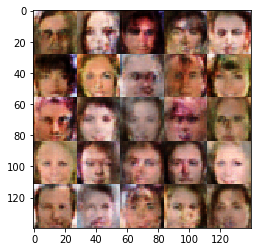

Iteration: 1951
Iteration: 1952
Iteration: 1953
Iteration: 1954
Iteration: 1955
Iteration: 1956
Iteration: 1957
Iteration: 1958
Iteration: 1959
Iteration: 1960
Epoch 0/1... Discriminator Loss: 1.1008... Generator Loss: 0.5849
Iteration: 1961
Iteration: 1962
Iteration: 1963
Iteration: 1964
Iteration: 1965
Iteration: 1966
Iteration: 1967
Iteration: 1968
Iteration: 1969
Iteration: 1970
Epoch 0/1... Discriminator Loss: 0.5584... Generator Loss: 1.2908
Iteration: 1971
Iteration: 1972
Iteration: 1973
Iteration: 1974
Iteration: 1975
Iteration: 1976
Iteration: 1977
Iteration: 1978
Iteration: 1979
Iteration: 1980
Epoch 0/1... Discriminator Loss: 0.8679... Generator Loss: 0.9791
Iteration: 1981
Iteration: 1982
Iteration: 1983
Iteration: 1984
Iteration: 1985
Iteration: 1986
Iteration: 1987
Iteration: 1988
Iteration: 1989
Iteration: 1990
Epoch 0/1... Discriminator Loss: 1.1511... Generator Loss: 0.7089
Iteration: 1991
Iteration: 1992
Iteration: 1993
Iteration: 1994
Iteration: 1995
Iteration: 1996


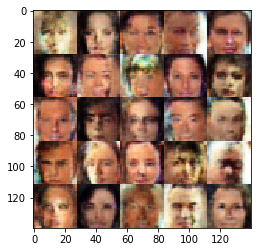

Iteration: 2001
Iteration: 2002
Iteration: 2003
Iteration: 2004
Iteration: 2005
Iteration: 2006
Iteration: 2007
Iteration: 2008
Iteration: 2009
Iteration: 2010
Epoch 0/1... Discriminator Loss: 0.7279... Generator Loss: 0.9708
Iteration: 2011
Iteration: 2012
Iteration: 2013
Iteration: 2014
Iteration: 2015
Iteration: 2016
Iteration: 2017
Iteration: 2018
Iteration: 2019
Iteration: 2020
Epoch 0/1... Discriminator Loss: 0.6981... Generator Loss: 1.0854
Iteration: 2021
Iteration: 2022
Iteration: 2023
Iteration: 2024
Iteration: 2025
Iteration: 2026
Iteration: 2027
Iteration: 2028
Iteration: 2029
Iteration: 2030
Epoch 0/1... Discriminator Loss: 1.1948... Generator Loss: 0.5930
Iteration: 2031
Iteration: 2032
Iteration: 2033
Iteration: 2034
Iteration: 2035
Iteration: 2036
Iteration: 2037
Iteration: 2038
Iteration: 2039
Iteration: 2040
Epoch 0/1... Discriminator Loss: 0.8569... Generator Loss: 0.6965
Iteration: 2041
Iteration: 2042
Iteration: 2043
Iteration: 2044
Iteration: 2045
Iteration: 2046


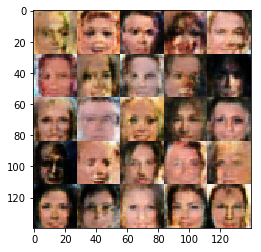

Iteration: 2051
Iteration: 2052
Iteration: 2053
Iteration: 2054
Iteration: 2055
Iteration: 2056
Iteration: 2057
Iteration: 2058
Iteration: 2059
Iteration: 2060
Epoch 0/1... Discriminator Loss: 0.8768... Generator Loss: 0.9165
Iteration: 2061
Iteration: 2062
Iteration: 2063
Iteration: 2064
Iteration: 2065
Iteration: 2066
Iteration: 2067
Iteration: 2068
Iteration: 2069
Iteration: 2070
Epoch 0/1... Discriminator Loss: 0.7618... Generator Loss: 1.3882
Iteration: 2071
Iteration: 2072
Iteration: 2073
Iteration: 2074
Iteration: 2075
Iteration: 2076
Iteration: 2077
Iteration: 2078
Iteration: 2079
Iteration: 2080
Epoch 0/1... Discriminator Loss: 0.9407... Generator Loss: 0.7337
Iteration: 2081
Iteration: 2082
Iteration: 2083
Iteration: 2084
Iteration: 2085
Iteration: 2086
Iteration: 2087
Iteration: 2088
Iteration: 2089
Iteration: 2090
Epoch 0/1... Discriminator Loss: 0.9982... Generator Loss: 0.7052
Iteration: 2091
Iteration: 2092
Iteration: 2093
Iteration: 2094
Iteration: 2095
Iteration: 2096


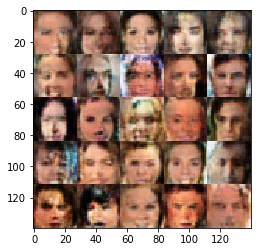

Iteration: 2101
Iteration: 2102
Iteration: 2103
Iteration: 2104
Iteration: 2105
Iteration: 2106
Iteration: 2107
Iteration: 2108
Iteration: 2109
Iteration: 2110
Epoch 0/1... Discriminator Loss: 0.9075... Generator Loss: 0.8429
Iteration: 2111
Iteration: 2112
Iteration: 2113
Iteration: 2114
Iteration: 2115
Iteration: 2116
Iteration: 2117
Iteration: 2118
Iteration: 2119
Iteration: 2120
Epoch 0/1... Discriminator Loss: 0.6895... Generator Loss: 1.1708
Iteration: 2121
Iteration: 2122
Iteration: 2123
Iteration: 2124
Iteration: 2125
Iteration: 2126
Iteration: 2127
Iteration: 2128
Iteration: 2129
Iteration: 2130
Epoch 0/1... Discriminator Loss: 0.6548... Generator Loss: 1.1727
Iteration: 2131
Iteration: 2132
Iteration: 2133
Iteration: 2134
Iteration: 2135
Iteration: 2136
Iteration: 2137
Iteration: 2138
Iteration: 2139
Iteration: 2140
Epoch 0/1... Discriminator Loss: 0.9013... Generator Loss: 0.7509
Iteration: 2141
Iteration: 2142
Iteration: 2143
Iteration: 2144
Iteration: 2145
Iteration: 2146


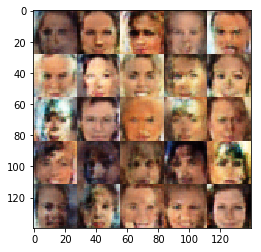

Iteration: 2151
Iteration: 2152
Iteration: 2153
Iteration: 2154
Iteration: 2155
Iteration: 2156
Iteration: 2157
Iteration: 2158
Iteration: 2159
Iteration: 2160
Epoch 0/1... Discriminator Loss: 1.0779... Generator Loss: 0.6932
Iteration: 2161
Iteration: 2162
Iteration: 2163
Iteration: 2164
Iteration: 2165
Iteration: 2166
Iteration: 2167
Iteration: 2168
Iteration: 2169
Iteration: 2170
Epoch 0/1... Discriminator Loss: 0.8346... Generator Loss: 1.0522
Iteration: 2171
Iteration: 2172
Iteration: 2173
Iteration: 2174
Iteration: 2175
Iteration: 2176
Iteration: 2177
Iteration: 2178
Iteration: 2179
Iteration: 2180
Epoch 0/1... Discriminator Loss: 1.1131... Generator Loss: 0.7781
Iteration: 2181
Iteration: 2182
Iteration: 2183
Iteration: 2184
Iteration: 2185
Iteration: 2186
Iteration: 2187
Iteration: 2188
Iteration: 2189
Iteration: 2190
Epoch 0/1... Discriminator Loss: 1.2266... Generator Loss: 0.5175
Iteration: 2191
Iteration: 2192
Iteration: 2193
Iteration: 2194
Iteration: 2195
Iteration: 2196


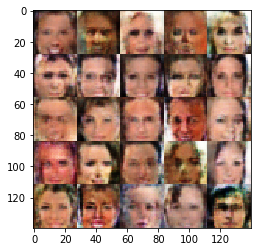

Iteration: 2201
Iteration: 2202
Iteration: 2203
Iteration: 2204
Iteration: 2205
Iteration: 2206
Iteration: 2207
Iteration: 2208
Iteration: 2209
Iteration: 2210
Epoch 0/1... Discriminator Loss: 0.5871... Generator Loss: 1.5157
Iteration: 2211
Iteration: 2212
Iteration: 2213
Iteration: 2214
Iteration: 2215
Iteration: 2216
Iteration: 2217
Iteration: 2218
Iteration: 2219
Iteration: 2220
Epoch 0/1... Discriminator Loss: 1.2623... Generator Loss: 0.4906
Iteration: 2221
Iteration: 2222
Iteration: 2223
Iteration: 2224
Iteration: 2225
Iteration: 2226
Iteration: 2227
Iteration: 2228
Iteration: 2229
Iteration: 2230
Epoch 0/1... Discriminator Loss: 1.0723... Generator Loss: 0.5990
Iteration: 2231
Iteration: 2232
Iteration: 2233
Iteration: 2234
Iteration: 2235
Iteration: 2236
Iteration: 2237
Iteration: 2238
Iteration: 2239
Iteration: 2240
Epoch 0/1... Discriminator Loss: 0.8577... Generator Loss: 0.8134
Iteration: 2241
Iteration: 2242
Iteration: 2243
Iteration: 2244
Iteration: 2245
Iteration: 2246


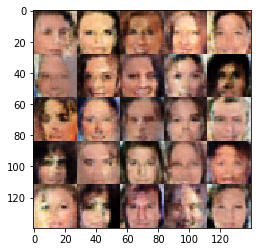

Iteration: 2251
Iteration: 2252
Iteration: 2253
Iteration: 2254
Iteration: 2255
Iteration: 2256
Iteration: 2257
Iteration: 2258
Iteration: 2259
Iteration: 2260
Epoch 0/1... Discriminator Loss: 1.0965... Generator Loss: 0.5603
Iteration: 2261
Iteration: 2262
Iteration: 2263
Iteration: 2264
Iteration: 2265
Iteration: 2266
Iteration: 2267
Iteration: 2268
Iteration: 2269
Iteration: 2270
Epoch 0/1... Discriminator Loss: 1.2250... Generator Loss: 0.5866
Iteration: 2271
Iteration: 2272
Iteration: 2273
Iteration: 2274
Iteration: 2275
Iteration: 2276
Iteration: 2277
Iteration: 2278
Iteration: 2279
Iteration: 2280
Epoch 0/1... Discriminator Loss: 0.8488... Generator Loss: 1.3359
Iteration: 2281
Iteration: 2282
Iteration: 2283
Iteration: 2284
Iteration: 2285
Iteration: 2286
Iteration: 2287
Iteration: 2288
Iteration: 2289
Iteration: 2290
Epoch 0/1... Discriminator Loss: 0.7929... Generator Loss: 0.9556
Iteration: 2291
Iteration: 2292
Iteration: 2293
Iteration: 2294
Iteration: 2295
Iteration: 2296


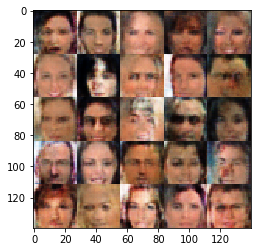

Iteration: 2301
Iteration: 2302
Iteration: 2303
Iteration: 2304
Iteration: 2305
Iteration: 2306
Iteration: 2307
Iteration: 2308
Iteration: 2309
Iteration: 2310
Epoch 0/1... Discriminator Loss: 1.0624... Generator Loss: 0.6088
Iteration: 2311
Iteration: 2312
Iteration: 2313
Iteration: 2314
Iteration: 2315
Iteration: 2316
Iteration: 2317
Iteration: 2318
Iteration: 2319
Iteration: 2320
Epoch 0/1... Discriminator Loss: 0.9224... Generator Loss: 0.8573
Iteration: 2321
Iteration: 2322
Iteration: 2323
Iteration: 2324
Iteration: 2325
Iteration: 2326
Iteration: 2327
Iteration: 2328
Iteration: 2329
Iteration: 2330
Epoch 0/1... Discriminator Loss: 1.4747... Generator Loss: 0.7751
Iteration: 2331
Iteration: 2332
Iteration: 2333
Iteration: 2334
Iteration: 2335
Iteration: 2336
Iteration: 2337
Iteration: 2338
Iteration: 2339
Iteration: 2340
Epoch 0/1... Discriminator Loss: 0.5531... Generator Loss: 1.2915
Iteration: 2341
Iteration: 2342
Iteration: 2343
Iteration: 2344
Iteration: 2345
Iteration: 2346


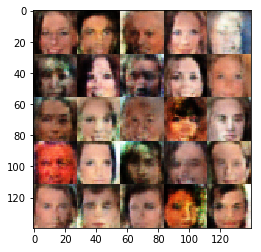

Iteration: 2351
Iteration: 2352
Iteration: 2353
Iteration: 2354
Iteration: 2355
Iteration: 2356
Iteration: 2357
Iteration: 2358
Iteration: 2359
Iteration: 2360
Epoch 0/1... Discriminator Loss: 1.2185... Generator Loss: 0.6921
Iteration: 2361
Iteration: 2362
Iteration: 2363
Iteration: 2364
Iteration: 2365
Iteration: 2366
Iteration: 2367
Iteration: 2368
Iteration: 2369
Iteration: 2370
Epoch 0/1... Discriminator Loss: 1.2460... Generator Loss: 0.5433
Iteration: 2371
Iteration: 2372
Iteration: 2373
Iteration: 2374
Iteration: 2375
Iteration: 2376
Iteration: 2377
Iteration: 2378
Iteration: 2379
Iteration: 2380
Epoch 0/1... Discriminator Loss: 1.1214... Generator Loss: 0.7437
Iteration: 2381
Iteration: 2382
Iteration: 2383
Iteration: 2384
Iteration: 2385
Iteration: 2386
Iteration: 2387
Iteration: 2388
Iteration: 2389
Iteration: 2390
Epoch 0/1... Discriminator Loss: 1.2346... Generator Loss: 0.4916
Iteration: 2391
Iteration: 2392
Iteration: 2393
Iteration: 2394
Iteration: 2395
Iteration: 2396


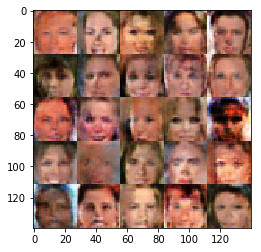

Iteration: 2401
Iteration: 2402
Iteration: 2403
Iteration: 2404
Iteration: 2405
Iteration: 2406
Iteration: 2407
Iteration: 2408
Iteration: 2409
Iteration: 2410
Epoch 0/1... Discriminator Loss: 1.1763... Generator Loss: 0.7652
Iteration: 2411
Iteration: 2412
Iteration: 2413
Iteration: 2414
Iteration: 2415
Iteration: 2416
Iteration: 2417
Iteration: 2418
Iteration: 2419
Iteration: 2420
Epoch 0/1... Discriminator Loss: 1.2286... Generator Loss: 0.5506
Iteration: 2421
Iteration: 2422
Iteration: 2423
Iteration: 2424
Iteration: 2425
Iteration: 2426
Iteration: 2427
Iteration: 2428
Iteration: 2429
Iteration: 2430
Epoch 0/1... Discriminator Loss: 1.0825... Generator Loss: 0.7322
Iteration: 2431
Iteration: 2432
Iteration: 2433
Iteration: 2434
Iteration: 2435
Iteration: 2436
Iteration: 2437
Iteration: 2438
Iteration: 2439
Iteration: 2440
Epoch 0/1... Discriminator Loss: 0.9788... Generator Loss: 0.6499
Iteration: 2441
Iteration: 2442
Iteration: 2443
Iteration: 2444
Iteration: 2445
Iteration: 2446


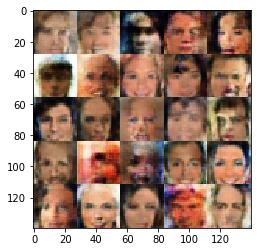

Iteration: 2451
Iteration: 2452
Iteration: 2453
Iteration: 2454
Iteration: 2455
Iteration: 2456
Iteration: 2457
Iteration: 2458
Iteration: 2459
Iteration: 2460
Epoch 0/1... Discriminator Loss: 1.1222... Generator Loss: 0.5868
Iteration: 2461
Iteration: 2462
Iteration: 2463
Iteration: 2464
Iteration: 2465
Iteration: 2466
Iteration: 2467
Iteration: 2468
Iteration: 2469
Iteration: 2470
Epoch 0/1... Discriminator Loss: 1.0159... Generator Loss: 0.6940
Iteration: 2471
Iteration: 2472
Iteration: 2473
Iteration: 2474
Iteration: 2475
Iteration: 2476
Iteration: 2477
Iteration: 2478
Iteration: 2479
Iteration: 2480
Epoch 0/1... Discriminator Loss: 0.9745... Generator Loss: 0.9325
Iteration: 2481
Iteration: 2482
Iteration: 2483
Iteration: 2484
Iteration: 2485
Iteration: 2486
Iteration: 2487
Iteration: 2488
Iteration: 2489
Iteration: 2490
Epoch 0/1... Discriminator Loss: 1.0820... Generator Loss: 0.9368
Iteration: 2491
Iteration: 2492
Iteration: 2493
Iteration: 2494
Iteration: 2495
Iteration: 2496


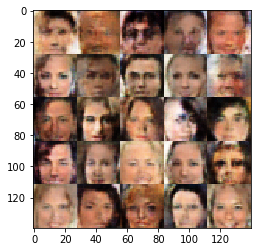

Iteration: 2501
Iteration: 2502
Iteration: 2503
Iteration: 2504
Iteration: 2505
Iteration: 2506
Iteration: 2507
Iteration: 2508
Iteration: 2509
Iteration: 2510
Epoch 0/1... Discriminator Loss: 0.6592... Generator Loss: 1.2424
Iteration: 2511
Iteration: 2512
Iteration: 2513
Iteration: 2514
Iteration: 2515
Iteration: 2516
Iteration: 2517
Iteration: 2518
Iteration: 2519
Iteration: 2520
Epoch 0/1... Discriminator Loss: 1.0993... Generator Loss: 0.7069
Iteration: 2521
Iteration: 2522
Iteration: 2523
Iteration: 2524
Iteration: 2525
Iteration: 2526
Iteration: 2527
Iteration: 2528
Iteration: 2529
Iteration: 2530
Epoch 0/1... Discriminator Loss: 0.6405... Generator Loss: 1.1906
Iteration: 2531
Iteration: 2532
Iteration: 2533
Iteration: 2534
Iteration: 2535
Iteration: 2536
Iteration: 2537
Iteration: 2538
Iteration: 2539
Iteration: 2540
Epoch 0/1... Discriminator Loss: 0.9297... Generator Loss: 0.8732
Iteration: 2541
Iteration: 2542
Iteration: 2543
Iteration: 2544
Iteration: 2545
Iteration: 2546


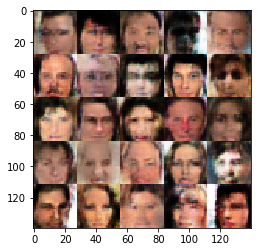

Iteration: 2551
Iteration: 2552
Iteration: 2553
Iteration: 2554
Iteration: 2555
Iteration: 2556
Iteration: 2557
Iteration: 2558
Iteration: 2559
Iteration: 2560
Epoch 0/1... Discriminator Loss: 1.2023... Generator Loss: 0.6921
Iteration: 2561
Iteration: 2562
Iteration: 2563
Iteration: 2564
Iteration: 2565
Iteration: 2566
Iteration: 2567
Iteration: 2568
Iteration: 2569
Iteration: 2570
Epoch 0/1... Discriminator Loss: 1.1945... Generator Loss: 0.6346
Iteration: 2571
Iteration: 2572
Iteration: 2573
Iteration: 2574
Iteration: 2575
Iteration: 2576
Iteration: 2577
Iteration: 2578
Iteration: 2579
Iteration: 2580
Epoch 0/1... Discriminator Loss: 1.0130... Generator Loss: 1.0702
Iteration: 2581
Iteration: 2582
Iteration: 2583
Iteration: 2584
Iteration: 2585
Iteration: 2586
Iteration: 2587
Iteration: 2588
Iteration: 2589
Iteration: 2590
Epoch 0/1... Discriminator Loss: 0.8796... Generator Loss: 0.8683
Iteration: 2591
Iteration: 2592
Iteration: 2593
Iteration: 2594
Iteration: 2595
Iteration: 2596


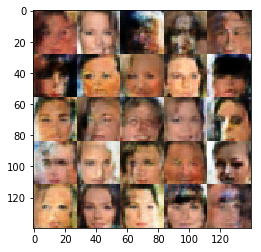

Iteration: 2601
Iteration: 2602
Iteration: 2603
Iteration: 2604
Iteration: 2605
Iteration: 2606
Iteration: 2607
Iteration: 2608
Iteration: 2609
Iteration: 2610
Epoch 0/1... Discriminator Loss: 0.7758... Generator Loss: 0.8996
Iteration: 2611
Iteration: 2612
Iteration: 2613
Iteration: 2614
Iteration: 2615
Iteration: 2616
Iteration: 2617
Iteration: 2618
Iteration: 2619
Iteration: 2620
Epoch 0/1... Discriminator Loss: 0.8978... Generator Loss: 0.9879
Iteration: 2621
Iteration: 2622
Iteration: 2623
Iteration: 2624
Iteration: 2625
Iteration: 2626
Iteration: 2627
Iteration: 2628
Iteration: 2629
Iteration: 2630
Epoch 0/1... Discriminator Loss: 0.8169... Generator Loss: 0.9898
Iteration: 2631
Iteration: 2632
Iteration: 2633
Iteration: 2634
Iteration: 2635
Iteration: 2636
Iteration: 2637
Iteration: 2638
Iteration: 2639
Iteration: 2640
Epoch 0/1... Discriminator Loss: 0.8695... Generator Loss: 0.8773
Iteration: 2641
Iteration: 2642
Iteration: 2643
Iteration: 2644
Iteration: 2645
Iteration: 2646


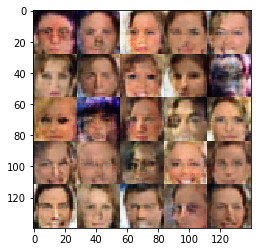

Iteration: 2651
Iteration: 2652
Iteration: 2653
Iteration: 2654
Iteration: 2655
Iteration: 2656
Iteration: 2657
Iteration: 2658
Iteration: 2659
Iteration: 2660
Epoch 0/1... Discriminator Loss: 1.0895... Generator Loss: 0.6484
Iteration: 2661
Iteration: 2662
Iteration: 2663
Iteration: 2664
Iteration: 2665
Iteration: 2666
Iteration: 2667
Iteration: 2668
Iteration: 2669
Iteration: 2670
Epoch 0/1... Discriminator Loss: 1.3518... Generator Loss: 0.4806
Iteration: 2671
Iteration: 2672
Iteration: 2673
Iteration: 2674
Iteration: 2675
Iteration: 2676
Iteration: 2677
Iteration: 2678
Iteration: 2679
Iteration: 2680
Epoch 0/1... Discriminator Loss: 1.3111... Generator Loss: 0.4964
Iteration: 2681
Iteration: 2682
Iteration: 2683
Iteration: 2684
Iteration: 2685
Iteration: 2686
Iteration: 2687
Iteration: 2688
Iteration: 2689
Iteration: 2690
Epoch 0/1... Discriminator Loss: 0.9737... Generator Loss: 0.7440
Iteration: 2691
Iteration: 2692
Iteration: 2693
Iteration: 2694
Iteration: 2695
Iteration: 2696


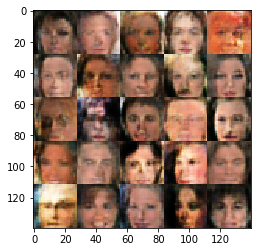

Iteration: 2701
Iteration: 2702
Iteration: 2703
Iteration: 2704
Iteration: 2705
Iteration: 2706
Iteration: 2707
Iteration: 2708
Iteration: 2709
Iteration: 2710
Epoch 0/1... Discriminator Loss: 1.0212... Generator Loss: 0.9718
Iteration: 2711
Iteration: 2712
Iteration: 2713
Iteration: 2714
Iteration: 2715
Iteration: 2716
Iteration: 2717
Iteration: 2718
Iteration: 2719
Iteration: 2720
Epoch 0/1... Discriminator Loss: 1.0532... Generator Loss: 0.7712
Iteration: 2721
Iteration: 2722
Iteration: 2723
Iteration: 2724
Iteration: 2725
Iteration: 2726
Iteration: 2727
Iteration: 2728
Iteration: 2729
Iteration: 2730
Epoch 0/1... Discriminator Loss: 1.3345... Generator Loss: 0.5004
Iteration: 2731
Iteration: 2732
Iteration: 2733
Iteration: 2734
Iteration: 2735
Iteration: 2736
Iteration: 2737
Iteration: 2738
Iteration: 2739
Iteration: 2740
Epoch 0/1... Discriminator Loss: 0.9456... Generator Loss: 0.8140
Iteration: 2741
Iteration: 2742
Iteration: 2743
Iteration: 2744
Iteration: 2745
Iteration: 2746


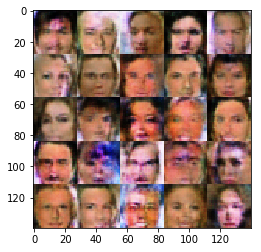

Iteration: 2751
Iteration: 2752
Iteration: 2753
Iteration: 2754
Iteration: 2755
Iteration: 2756
Iteration: 2757
Iteration: 2758
Iteration: 2759
Iteration: 2760
Epoch 0/1... Discriminator Loss: 0.8906... Generator Loss: 1.4619
Iteration: 2761
Iteration: 2762
Iteration: 2763
Iteration: 2764
Iteration: 2765
Iteration: 2766
Iteration: 2767
Iteration: 2768
Iteration: 2769
Iteration: 2770
Epoch 0/1... Discriminator Loss: 1.3166... Generator Loss: 0.4673
Iteration: 2771
Iteration: 2772
Iteration: 2773
Iteration: 2774


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.